2018 Edition

# Estimating Financial Risk through Monte Carlo Simulation
Risk analysis is part of every decision we make when faced with uncertainty, ambiguity, and variability. Indeed, even though we have unprecedented access to information, we can't accurately predict the future. In finance, there is a fair amount of uncertainty and risk involved with estimating the future value of financial products, due to the wide variety of potential outcomes. Monte Carlo simulation (also known as the Monte Carlo Method) allows inspecting many possible outcomes of the decision making process, and can be used to assess the impact of risk: this, in turns, allows for better decision-making under uncertainty.

## Goals
The main objectives we set for this Notebook are as follows:
1. Develop fundamental knowledge about Risk analysis
2. Understand Monte Carlo Simulation (MCS)
3. Apply Monte Carlo Simulation for predicting risk


## Steps
1. First, in section 1, we introduce the basics of MCS
2. In section 2, we work on a simple example to where we apply the MCS method
3. In section 3, we briefly summarize the main characteristics of the Monte Carlo Simulation (MCS) technique
4. In section 4, we overview the common distributions which are often used in MCS
5. In section 5, we work on a real use case, that focuses on estimating financial risk. We will use techniques such as featurization  (that is, generating additional features to improve model accuracy), linear regression, kernel density estimation, sampling distributions and so on ...

## Reference
This Notebook is inspired by Chapter 9 of the book [Advanced Analytics with Spark](http://shop.oreilly.com/product/0636920035091.do) by Josh Wills, Sandy Ryza, Sean Owen, and Uri Laserson. It is strongly suggested to read this Chapter to get a general idea of the topic of this Notebook.

# 1. Introduction

## 1.1. Monte Carlo Simulation (MCS)
Monte Carlo simulation is a computerized mathematical technique that can be applied such that it is possible to account for risk in quantitative analysis and decision making. This technique is used in many different fields, such as R&D, risk management, portfolio management, pricing derivatives, strategic planning, project planning, cost modeling and many more.

In general, MCS is a technique that "converts" uncertainty on input variables of a model into **probability distributions**. By combining the distributions and randomly selecting values from them, it recalculates the simulated model many times, to determine the probability of the output.

Historically, this technique was first used by scientists working on the atomic bomb: it was named after Monte Carlo, the Monaco resort town renowned for its casinos.  Since its introduction in World War II, Monte Carlo simulation has been used to model a variety of physical and conceptual systems.

## 1.2. How does it work?
Monte Carlo simulation performs risk analysis by building models of possible results by *substituting a range of possible input values, that constitute uncertainty, into a statistical distribution*. It then computes possible outcomes repeatedly, each time using a different set of random values from the probability functions that "model" the input. Depending upon the number of random input variables and their distribution, a Monte Carlo simulation could involve thousands or tens of thousands of "rounds" before it is complete. When complete, *Monte Carlo simulation produces distributions of possible outcome values*.

By using probability distributions instead of actual input samples, it is possible to model more accurately uncertainty: different choices of distributions will yield different outputs.

# 2. Illustrative example

Imagine you are the marketing manager for a firm that is planning to introduce a new product. You need to estimate the first-year net profit from this product, which might depend on:

- Sales volume in units
- Price per unit (also called "Selling price")
- Unit cost
- Fixed costs

Net profit will be calculated as $Net Profit = Sales Volume* (Selling Price - Unit cost) - Fixed costs$.  Fixed costs (accounting for various overheads, advertising budget, etc.) are known to be \$ 120,000, which we assume to be deterministic. All other factors, instead, involve some uncertainty: *sales volume* (in units) can cover quite a large range, the *selling price* per unit will depend on competitor actions, which are hard to predict, and *unit costs* will also vary depending on vendor prices and production experience, for example.

Now, to build a risk analysis model, we must first identify the uncertain variables -- which are essentially random variables.  While there's some uncertainty in almost all variables in a business model, we want to focus on variables where the range of values is significant.

## 2.1. Unit sales and unit price

Based on a hypothetical market research you have done, you have beliefs that there are equal chances for the market to be `slow`, `normal`, or `hot`:

- In a "slow" market, you expect to sell 50,000 units at an average selling price of \$11.00 per unit
- In a "normal" market, you expect to sell 75,000 units, but you'll likely realize a lower average selling price of \$10.00 per unit
- In a "hot" market, you expect to sell 100,000 units, but this will bring in competitors, who will drive down the average selling price to \$8.00 per unit

### Question 1
<div class="alert alert-info">
Calculate the average units and the unit price that you expect to sell, which depend on the market state. Use the assumptions above to compute the expected quantity of products and their expected unit price. 
</div>


In [36]:

average_unit = (100000 + 75000 + 50000) / 3
average_price = (11 + 10 + 8) / 3
print("average unit:", average_unit)
print("average_price:", average_price)


average unit: 75000.0
average_price: 9.666666666666666


## 2.2. Unit Cost

Another uncertain variable is Unit Cost. In our illustrative example, we assume that your firm's production manager advises you that unit costs may be anywhere from \$5.50 to \$7.50, with a most likely expected cost of \$6.50. In this case, the most likely cost can be considered as the average cost.

## 2.3. A Flawed Model: using averages to represent our random variables
Our next step is to identify uncertain functions -- also called functions of a random variable.  Recall that Net Profit is calculated as $Net Profit = Sales Volume * (Selling Price - Unit cost) - Fixed costs$.  However, Sales Volume, Selling Price and Unit Cost are all uncertain variables, so Net Profit is an uncertain function.

The simplest model to predict the Net Profit is using average of sales volume, average of selling price and average of unit cost for calculating. So, if only consider averages, we can say that the $Net Profit = 75,000*(9.66666666 - 6.5) - 120,000 \sim 117,500$.

However, as [Dr. Sam Savage](http://web.stanford.edu/~savage/faculty/savage/) warns, "Plans based on average assumptions will be wrong on average." The calculated result is far from the actual value: indeed, the **true average Net Profit** is roughly  \$93,000, as we will see later in the example.

### Question 2
#### Question 2.1
<div class="alert alert-info">
Write a function named `calNetProfit` to calculate the Net Profit using the average of sales volume, the average of selling price and the average of unit cost.
</div>

In [37]:

def calNetProfit(average_unit, average_price, average_unitcost, fixed_cost):
    return average_unit * (average_price - average_unitcost) - fixed_cost

average_unitcost = 6.5
fixed_cost = 120000
NetProfit = calNetProfit(average_unit,average_price,average_unitcost,fixed_cost)
print("Net profit:", NetProfit)


Net profit: 117499.99999999994


#### Question 2.2
<div class="alert alert-info">
Verify the warning message of Dr. Sam Savage by calculating the error of our estimated Net Profit using averages only. Recall that the true value is roughly \$93,000, so we are interested in:
<ul></ul>

$$ error = \frac{your\_value - true\_value}{true\_value}$$

<ul></ul>
Note also we are interested in displaying the error as a percentage.
<ul></ul>
Looking at the error we make, do you think that we can use the current model that only relies on averages?
</div>

In [38]:

trueNetProfit = 93000
error = (NetProfit - trueNetProfit) / (trueNetProfit)
print("Error in percentage:", error * 100)


Error in percentage: 26.344086021505316


<div class="alert alert-warning">

No, we can not use the current model. An error of 26 % is a huge amount when it commes to calculating financial risk. So to have any hope of beeing able to create and manage a portifolio, we need finf a better way to estimate the performance of our stocks.

</div>

## 2.4. Using the Monte Carlo Simulation method to improve our model
As discussed before, the selling price and selling volume both depend on the state of the market scenario (slow/normal/hot). So, the net profit is the result of two random variables: `market scenario` (which in turn determines `sales volumes` and `selling price`) and `unit cost`.

Now, let's assume (this is an *a-priori* assumption we make) that `market scenario` follows a discrete, uniform distribution and that `unit cost` also follows a uniform distribution. Then, we can compute directly the values for selling price and selling volumes based on the outcome of the random variable `market scenario`, as shown in Section 2.1.

From these a-priori distributions, in each run (or trial) of our Monte Carlo simulation, we can generate the sample value for each random variable and use it to calculate the Net Profit. The more simulation runs, the more accurate our results will be. For example, if we run the simulation 100,000 times, the average net profit will amount to roughly \$92,600. Every time we run the simulation, a different prediction will be output: the average of such predictions will consistently be less than \$117,500, which we predicted using averages only.

Note also that in this simple example, we generate values for the `market scenario` and `unit cost` independently: we consider them to be **independent random variables**. This means that the eventual (and realistic!) correlation between the `market scenario` and `unit cost` variables is ignored. Later, we will learn how to be more precise and account for dependency between random variables.


### Question 3
#### Question 3.1
<div class="alert alert-info">
Write a function named `get_sales_volume_price` that returns the sales volume and price based on the market scenario. In particular, the scenario can get one of three values:
<ul>
  <li>0: Slow market</li>
  <li>1: Normal market</li>
  <li>2: Hot market</li>
</ul>  

The return value is a tuple in the form: `(sales_volume, price)`
</div>

In [39]:

# Get sales volume and  price based on market scenario
# the function returns a tuple of (sales_volume, price)
def get_sales_volume_price(scenario):
    # Slow market
    if scenario == 0:
        return (50000,11)
    # Normal market
    if scenario == 1:
        return (75000,10)
    # Hot market
    if scenario == 2:
        return (100000,8)


#### Question 3.2
<div class="alert alert-info">
Run 100,000 Monte Carlo simulations and calculate the average net profit they produce. Then, compare the result to the "average model" we used in the previous questions (the one we called "flawed" model). Put your comments about the discrepancies between a simplistic model, and the more accurate MCS approach.  
<ul></ul>
Note that in each iteration, the `unit_cost` and `market_scenario` are generated according to their distributions. Also, recall what we have seen in Section 2.2: your firm account manager helped you with some research, to determine the variability of your random variables.  
</div>


<div class="label label-success">HINT</div>  

Function `uniform(a,b)` in module `random` generates a number $a<=c<=b$, which is drawn from a uniform distribution.  

Function `randint(a,b)` helps you generating an integer number $a<=c<=b$

In [40]:

import random

total = 0.0
num_simulation = 100000
for i in range(0,num_simulation):
    unit_cost = random.uniform(5.5,7.5)
    market_scenario = random.randint(0,2)
    sales_volume, price = get_sales_volume_price(market_scenario)
    netProfit = calNetProfit(sales_volume,price,unit_cost,fixed_cost)
    total = total + netProfit

print("average net profit:", total / num_simulation)


average net profit: 92469.97182095963


<div class="alert alert-warning">
As we can see our profit is much lower than the etimage we calculated using only average values. This shows that using average values is not a good way to model market scenarios. The model is still to simple and needs to be expanded.
</div>


# 3. A brief summary of the Monte Carlo Simulation (MCS) technique

- A MCS allows several inputs to be used at the same time to compute the probability distribution of one or more outputs
- Different types of probability distributions can be assigned to the inputs of the model, depending on any *a-priori* information that is available. When the distribution is completely unknown, a common technique is to use a distribution computed by finding the best fit to the data you have
- The MCS method is also called a **stochastic method** because it uses random variables. Note also that the general assumption is for input random variables to be independent from each other. When this is not the case, there are techniques to account for correlation between random variables.
- A MCS generates the output as a range instead of a fixed value and shows how likely the output value is to occur in that range. In other words, the model outputs a probability distribution.

# 4. Common distributions used in MCS
In what follows, we summarize the most common probability distributions that are used as *a-priori* distributions for input random variables:

- *Normal/Gaussian Distribution*: this is a continuous distribution applied in situations where the mean and the standard deviation of a given input variable are given, and the mean represents the most probable value of the variable. In other words, values "near" the mean are most likely to occur.  This is symmetric distribution, and it is not bounded in its co-domain. It is very often used to  describe natural phenomena, such as people’s heights, inflation rates, energy prices, and so on and so forth. An illustration of a normal distribution is given below:
![normal_distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/320px-Normal_Distribution_PDF.svg.png)

- *Lognormal Distribution*: this is a distribution which is appropriate for variables taking values in the range $[0, \infty]$. Values are positively skewed, not symmetric like a normal distribution.  Examples of variables described by some lognormal distributions include, for example, real estate property values, stock prices, and oil reserves. An illustration of a lognormal distribution is given below:
![log_normal_distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/PDF-log_normal_distributions.svg/320px-PDF-log_normal_distributions.svg.png) 

- *Triangular Distribution*: this is a continuous distribution with fixed minimum and maximum values. It is bounded by the minimum and maximum values and can be either symmetrical (the most probable value = mean = median) or asymmetrical. Values around the most likely value (e.g. the mean) are more likely to occur.  Variables that could be described by a triangular distribution include, for example, past sales history per unit of time and inventory levels. An illustration of a triangular distribution is given below:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Triangular_distribution_PMF.png/320px-Triangular_distribution_PMF.png)

- *Uniform Distribution*: this is a continuous distribution bounded by known minimum and maximum values. In contrast to the triangular distribution, the likelihood of occurrence of the values between the minimum and maximum is the same. In other words, all values have an equal chance of occurring, and the distribution is simply characterized by the minimum and maximum values. Examples of variables that can be described by a uniform distribution include manufacturing costs or future sales revenues for a new product. An illustration of the uniform distribution is given below:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/320px-Uniform_Distribution_PDF_SVG.svg.png)

- *Exponential Distribution*: this is a continuous distribution used to model the time that pass between independent occurrences, provided that the rate of occurrences is known. An example of the exponential distribution is given below:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Exponential_pdf.svg/320px-Exponential_pdf.svg.png)

- *Discrete Distribution* : for this kind of distribution, the "user" defines specific values that may occur and the likelihood of each of them.  An example might be the results of a lawsuit: 20% chance of positive verdict, 30% change of negative verdict, 40% chance of settlement, and 10% chance of mistrial.


# 5. A real use case: estimating the financial risk of a portfolio of stocks
We hope that by now you have a good understanding about Monte Carlo simulation. Next, we apply this method to a real use case: *financial risk estimation*.

Imagine that you are an investor on the stock market. You plan to buy some stocks and you want to estimate the maximum loss you could incur after two weeks of investing. This is the quantity that the financial statistic "Value at Risk" (VaR) seeks to measure. [VaR](https://en.wikipedia.org/wiki/Value_at_risk) is defined as a measure of investment risk that can be used as a reasonable estimate of the maximum probable loss for a value of an investment portfolio, over a particular time period. A VaR statistic depends on three parameters: a portfolio, a time period, and a confidence level. A VaR of 1 million dollars with a 95% confidence level over two weeks, indicates the belief that the portfolio stands only a 5% chance of losing more than 1 million dollars over two weeks. VaR has seen widespread use across financial services organizations. This statistic plays a vital role in determining how much cash investors must hold to meet the credit ratings that they seek. In addition, it is also used to understand the risk characteristics of large portfolios: it is a good idea to compute the VaR before executing trades, such that it can help take informed decisions about investments. 

Our goal is calculating VaR of two weeks interval with 95% confidence level and the associated [VaR confidence interval](http://www.investopedia.com/ask/answers/041615/whats-difference-between-confidence-level-and-confidence-interval-value-risk-var.asp).


## 5.1. Terminology
In this use case, we will use some terms that might require a proper definition, given the domain. This is what we call the *Domain Knowledge*.

- **Instrument**: A tradable asset, such as a bond, loan, option, or stock investment. At any particular time, an instrument is considered to have a value, which is the price for which it can be sold. In the use case of this notebook, instruments are stock investments.
- **Portfolio**: A collection of instruments owned by a financial institution. 
- **Return**: The change in an instrument or portfolio’s value over a time period. 
- **Loss**: A negative return. 
- **Index**: An imaginary portfolio of instruments. For example, the NASDAQ Composite index includes about 3,000 stocks and similar instruments for major US and international companies. 
- **Market factor**: A value that can be used as an indicator of macro aspects of the financial climate at a particular time. For example, the value of an index, the Gross Domestic Product of the United States, or the exchange rate between the dollar and the euro. We will often refer to market factors as just factors.

## 5.2. The context of our use case
We have a list of instruments that we plan to invest in. The historical data of each instrument has been collected for you. For simplicity, assume that the returns of instruments at a given time, depend on 4 market factors only: 

- GSPC value
- IXIC value 
- The return of crude oil
- The return of treasury bonds

Our goal is building a model to predict the loss after two weeks' time interval with confidence level set to 95%.

As a side note, it is important to realize that the approach presented in this Notebook is a simplified version of what would happen in a real Financial firm. For example, the returns of instruments at a given time often depend on more than 4 market factors only! Moreover, the choice of what constitute an appropriate market factor is an art!



## 5.3. The Data
The stock data can be downloaded (or scraped) from Yahoo! by making a series of REST calls. The data includes multiple files. Each file contains the historical information of each instrument that we want to invest in. The data is in the following format (with some samples):
```
Date, Open, High, Low, Close, Volume, Adj Close
2016-01-22,66.239998,68.07,65.449997,67.860001,137400,67.860001
2016-01-21,65.410004,66.18,64.459999,65.050003,148000,65.050003
2016-01-20,64.279999,66.32,62.77,65.389999,141300,65.389999
2016-01-19,67.720001,67.989998,64.720001,65.379997,178400,65.379997
```

The data of GSPC and IXIC values (our two first market factors) are also available on Yahoo! and use the very same format. 

The crude oil and treasure bonds data is collected from investing.com, and has a different format, as shown below (with some samples):
```
Date    Price   Open    High    Low     Vol.    Change %
Jan 25, 2016    32.17   32.36   32.44   32.10   -       -0.59%
Jan 24, 2016    32.37   32.10   32.62   31.99   -       0.54%
Jan 22, 2016    32.19   29.84   32.35   29.53   -       9.01%
Jan 21, 2016    29.53   28.35   30.25   27.87   694.04K 11.22%
Jan 20, 2016    26.55   28.33   28.58   26.19   32.11K  -6.71%
Jan 19, 2016    28.46   29.20   30.21   28.21   188.03K -5.21%
```

In our use case, the factors' data will be used jointly to build a statistical model: as a consequence, we first need to preprocess the data to proceed.

## 5.4. Data preprocessing
In this Notebook, all data files have been downloaded for you, such that you can focus on pre-processing. Next, we will:

  - Read the factor data files which are in two different formats, process and merge them together
  - Read the stock data and pre-process it
  - Trim all data into a specific time region
  - Fill in the missing values
  - Generate the data of returns in each two weeks' time interval window
  
### Factor data pre-processing

We need two functions to read and parse data from Yahoo! and Investing.com respectively. We are interested only in information about the time and the corresponding returns of a factor or an instrument: as a consequence, we will project away many columns of our RAW data, and keep only the information we are interested in.

The 3000-instrument and the 4-factor history are small enough to be read and processed locally: we do not need to use the power of parallel computing to proceed. Note that this is true also for larger cases with hundreds of thousands of instruments and thousands of factors. The need for a distributed system like Spark comes in when actually **running** the Monte Carlo simulations, which can require massive amounts of computation on each instrument. 

### Question 4
#### Question 4.1
<div class="alert alert-info">
Write a function named `readInvestingDotComHistory` to parse data from investing.com based on the format specified above (see Section 5.3). Recall that we use two factors here: one that is related to the price of crude oil, one that is related to some specific US bonds. 

<ul></ul>

Print the first 5 entries of the first factor (crude oil price) in the parsed data.

<ul></ul>

Note that we are only interested in the date and price of stocks.

</div>

<div class="label label-success">HINT</div>  
You can parse a string to `datetime` object by using the function `strptime(<string>, <dtime_format>)`. In this case, the datetime format is `"%b %d, %Y"`. For more information, please follow this [link](https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior).

In the next cell, we simply copy data from our HDFS cluster (that contains everything we need for this Notebook) to the instance (a Docker container) running your Notebook. This means that you will have "local" data that you can process without using Spark. Note the folder location: find and verify that you have correctly downloaded the files!

In [41]:
! [ -d monte-carlo-risk ] || (echo "Downloading prepared data from HDFS. Please wait..." ; hdfs dfs -copyToLocal /datasets/monte-carlo-risk . ; echo "Done!";)

In [1]:
# Use pandas
from datetime import datetime
from datetime import timedelta
from itertools import islice
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

base_folder = "monte-carlo-risk/"

factors_folder= base_folder + "factors/"

# read data from local disk
def readInvestingDotComHistory(fname):
    def process_line(line):
        cols = line.split("\t")
        date = datetime.strptime(cols[0],"%b %d, %Y")
        value = float(cols[1])
        return (date, value)
    
    with open(fname) as f:
        content_w_header = f.readlines()
        # remove the first line 
        # and reverse lines to sort the data by date, in ascending order
        content = content_w_header[1:]
        data = list(map(process_line,content))
        data.sort(key=lambda x:x[0])
        return data

factor1_files = ['crudeoil.tsv', 'us30yeartreasurybonds.tsv']
factor1_files = map(lambda fn: factors_folder + fn, factor1_files)
factors1 = [readInvestingDotComHistory(f) for f in factor1_files]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now, the data structure `factors1` is a list, containing data that pertains to two (out of a total of four) factors that influence the market, as obtained by investing.com. Each element in the list is a tuple, containing some sort of timestamp, and the value of one of the two factors discussed above. From now on, we call these elements "**records**" or "**entries**". Visually, `factors1` looks like this:

| 0 (crude oil) | 1 (US bonds)|
| --- | --- |
| time_stamp, value | time_stamp, value |
| ... | ... |
| time_stamp, value | time_stamp, value |
| ... | ... |


#### Question 4.2
<div class="alert alert-info">
Write a function named `readYahooHistory` to parse data from yahoo.com based on its format, as described in Section 5.3.  
<ul></ul>
Print the first 5 entries of the first factor (namely GSPC). Comment the time range of the second batch of data we use in our Notebook.  
<ul></ul>

Note that we are only interested in the date and price of stocks.
</div>

<div class="label label-danger">NOTE</div> The datetime format now is in a different format than the previous one.

<div class="label label-success">HINT</div> Use a terminal (or put the bash commands inline in your Notebook) to list filenames in your local working directory to find and have a look at your local files.

In [2]:


def readYahooHistory(fname):
    def process_line(line):
        cols = line.split(",")
        date = datetime.strptime(cols[0],"%Y-%m-%d")
        value = float(cols[1])
        return (date, value)
    
    with open(fname) as f:
        content_w_header = f.readlines()
        # remove the first line 
        # and reverse lines to sort the data by date, in ascending order
        content = content_w_header[1:]
        data = list(map(process_line,content))
        data.sort(key=lambda x:x[0])
        return data
        


factor2_files = ["GSPC.csv","IXIC.csv"]
factor2_files = map(lambda fn: factors_folder + fn, factor2_files)

factors2 = [readYahooHistory(f) for f in factor2_files]

#Print 5 first entries in the first factor (Crude OIL)
print(pd.DataFrame(data=factors2[0][:5]))


           0      1
0 1950-01-03  16.66
1 1950-01-04  16.85
2 1950-01-05  16.93
3 1950-01-06  16.98
4 1950-01-09  17.08


<div class="alert alert-success">
We can see that the time range of NASDAQ and S&P 500 are much bigger than the two first factors. We have data all the way from 1950 to now. But since the two other factors have such small time ranges, the old data presented here wont be helpfull to our simulation.
</div>

Now, the data structure `factors2` is again list, containing data that pertains to the next two (out of a total of four) factors that influence the market, as obtained by Yahoo!. Each element in the list is a tuple, containing some sort of timestamp, and the value of one of the two factors discussed above. Visually, `factors2` looks like this:

| 0 (GSPC) | 1 (IXIC)|
| --- | --- |
| time_stamp, value | time_stamp, value |
| ... | ... |
| time_stamp, value | time_stamp, value |
| ... | ... |


### Stock data pre-processing

Next, we prepare the data for the instruments we consider in this Notebook (i.e., the stocks we want to invest in). 

#### Question 4.3

<div class="alert alert-info">
In this Notebook, we assume that we want to invest on the first 35 stocks out of the total 3000 stocks present in our datasets.

<ul></ul>

Load and prepare all the data for the considered instruments (the first 35 stocks) which have historical information for more than 5 years. This means that all instruments with less than 5 years of history should be removed.

</div>

<div class="label label-success">HINT</div> we suggest to open a terminal window (not on your local machine, but the Notebook terminal that you can find on the Jupyter dashboard) and visually check the contents of the directories holding our dataset, if you didn't do this before! Have a look at how stock data is organized!

In [3]:

from os import listdir
from os.path import isfile, join

stock_folder = base_folder + 'stocks'

def process_stock_file(fname,columns):
    try:
        #All columns to be selected and used later
        all_cols = ["Date"] + columns
        #Read file from csv using pandas and selecting wanted collumns
        df = pd.read_csv(fname)[all_cols]
        #Turn the date column into datetime objects
        df["Date"] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
        #Return the stock data sorted by data from oldes to newest
        return sorted(df.values.tolist(),key=lambda x:x[0])
    except Exception as e:
        raise e
        return None

#Returns stock files for given inputs. If none is presented it reads the n all the stock files.
#Indices = Select the stocks at given positions sorted alphabetically.
#Start = The start time of the stocks we want to keep. Used for filtering stocks.
#End = End time of the stoks we want to keep. Used for filtering stocks.
#columns = Columns from the csv file that we want to keep other than "Date". NOT CURRENTLY USED
def readStockFiles(numFiles=None,indices=[],start=None,end=None,columns=["Open"]):
    # select path of all stock data files in "stock_folder"
    files = [join(stock_folder, f) for f in listdir(stock_folder) if isfile(join(stock_folder, f))]

    #If a list of indices is given, select files for given indices
    if (len(indices) != 0):
        files = [files[int(i)] for i in indices]
    
    # if numFiles is given, select n first files
    if numFiles != None:
        files = files[:numFiles]

    # read each line in each file, convert it into the format: (date, value)
    rawStocks = [process_stock_file(f,columns) for f in files]

    # select only instruments which have more than 5 years of history
    # Note: the number of business days in a year is 260
    rawStocks = list(filter(lambda instrument: instrument != None, rawStocks))

    #Some of the instruments seem corrupted, so filter those out.
    rawStocks = list(filter(lambda instrument: np.max(np.array(instrument)[:,1]) <= 2752.56, rawStocks))
    
    number_of_years = 5
    
    if(start != None and end != None):
        return list(filter(lambda instrument: instrument[0][0] <= start and instrument[-1][0] >= end, rawStocks))
    
    elif(start != None and end == None):
        return list(filter(lambda instrument: instrument[0][0] <= start, rawStocks))
    
    elif(start == None and end != None):
        return list(filter(lambda instrument: instrument[-1][0] >= start, rawStocks))
    
    else:
        return list(filter(lambda instrument: len(instrument) >= number_of_years * 260, rawStocks))
    

# assume that we invest only the first 35 stocks (for faster computation)
rawStocks = readStockFiles(35)
# For testing, print the first 5 entry of the first stock
print(pd.DataFrame(data=rawStocks[0][:5],columns=['Date','Open']))

        Date  Open
0 1997-08-14  39.0
1 1997-08-15  42.0
2 1997-08-18  44.0
3 1997-08-19  55.5
4 1997-08-20  48.0


### Time alignment for our data
Different types of instruments may trade on different days, or the data may have missing values for other reasons, so it is important to make sure that our different histories align. First, we need to trim all of our time series to the same region in time. Then, we need to fill in missing values. To deal with time series that have missing values at the start and end dates in the time region, we simply fill in those dates with nearby values in the time region.

#### Question 4.4
<div class="alert alert-info">
Assume that we only focus on the data from 23/01/2009 to 23/01/2014. Write a function named `trimToRegion` to select only the records in that time interval. 

<ul></ul>

**Requirements**: after processing, each instrument $i$ has a list of records: $[r_0, r_2,...,r_{m_i}]$ such that $r_0$ and $r_{m_i}$ are assigned, respectively, the first and the last values corresponding to the extremes of the given time interval. For example: $r_0$ should contain the value at date 23/01/2009.
</div>

In [4]:

# note that the data of crude oil and treasury is only available starting from 26/01/2006 
start = datetime(year=2009, month=1, day=23)
end = datetime(year=2014, month=1, day=23)

def trimToRegion(history, start, end):

    def isInTimeRegion(entry):
        (date, value) = entry
        #date = datetime.strptime(date,"%Y-%m-%d")
        return date >= start and date <= end

    # only select entries which are in the time region
    trimmed = list(filter( isInTimeRegion, history))
    
    # if the data has incorrect time boundaries, add time boundaries
    if trimmed[0][0] != start:
        trimmed.insert(0, [start, trimmed[0][1]])
    if trimmed[-1][0] != end:
        trimmed.append([end, trimmed[-1][1]])
    return trimmed


# test our function
trimmedStock0  = trimToRegion(rawStocks[0], start, end)
# the first 5 records of stock 0
print(trimmedStock0[:5])
# the last 5 records of stock 0
print(trimmedStock0[-5:])

assert(trimmedStock0[0][0] == start), "the first record must contain the price in the first day of time interval"
assert(trimmedStock0[-1][0] == end), "the last record must contain the price in the last day of time interval"


[[Timestamp('2009-01-23 00:00:00'), 19.4], [Timestamp('2009-01-26 00:00:00'), 19.67], [Timestamp('2009-01-27 00:00:00'), 19.809998999999998], [Timestamp('2009-01-28 00:00:00'), 20.469998999999998], [Timestamp('2009-01-29 00:00:00'), 21.41]]
[[Timestamp('2014-01-16 00:00:00'), 37.369999], [Timestamp('2014-01-17 00:00:00'), 37.470001], [Timestamp('2014-01-21 00:00:00'), 37.73], [Timestamp('2014-01-22 00:00:00'), 37.779999], [Timestamp('2014-01-23 00:00:00'), 37.59]]


### Dealing with missing values
We expect that we have the price of instruments and factors **in each business day**. Unfortunately, there are many missing values in our data: this means that we miss data for some days, e.g. we have data for the Monday of a certain week, but not for the subsequent Tuesday. So, we need a function that helps filling these missing values.

Next, we provide to you the function to fill missing value: read it carefully!

In [5]:
def fillInHistory(history, start, end):
    curr = history
    filled = []
    idx = 0
    curDate = start
    numEntries = len(history)
    while curDate < end:
        # if the next entry is in the same day
        # or the next entry is at the weekend
        # but the curDate has already skipped it and moved to the next monday
        # (only in that case, curr[idx + 1][0] < curDate )
        # then move to the next entry
        while idx + 1 < numEntries and curr[idx + 1][0] <= curDate:
            idx +=1
        # only add the last value of instrument in a single day
        # check curDate is weekday or not
        # 0: Monday -> 5: Saturday, 6: Sunday
        if curDate.weekday() < 5:
            filled.append((curDate, curr[idx][1]))
            # move to the next business day
            curDate += timedelta(days=1)
        # skip the weekends
        if curDate.weekday() >= 5:
        # if curDate is Sat, skip 2 days, otherwise, skip 1 day
            curDate += timedelta(days=7-curDate.weekday())
    return filled

#### Question 4.5
<div class="alert alert-info">
Trim data of stocks and factors into the given time interval.
</div>

In [6]:

# Trims the stocks, and fills the missing history for a given period
def trimStocks(rawStocks,start,end):
    return list(map(lambda stock: fillInHistory(trimToRegion(stock, start, end) , start, end), rawStocks))

#trim each stock into a time region
stocks = trimStocks(rawStocks,start,end)


# Trims the factors, and fills the missing history for a given period
def trimFactors(rawFactors,start,end):
    return list(map(lambda factor: fillInHistory(trimToRegion(factor,start,end),start,end),allfactors))

# merge the two factors
allfactors = factors1 + factors2
# trim each factor into a time region
factors = trimFactors(allfactors,start,end)
            
# test our code
print("the first 5 records of stock 0:", stocks[0][:5], "\n")
print("the last 5 records of stock 0:", stocks[0][-5:], "\n")
print("the first 5 records of factor 0:", factors[0][:5], "\n")
print("the first 5 records of factor 0:", factors[0][-5:], "\n")


the first 5 records of stock 0: [(datetime.datetime(2009, 1, 23, 0, 0), 19.4), (datetime.datetime(2009, 1, 26, 0, 0), 19.67), (datetime.datetime(2009, 1, 27, 0, 0), 19.809998999999998), (datetime.datetime(2009, 1, 28, 0, 0), 20.469998999999998), (datetime.datetime(2009, 1, 29, 0, 0), 21.41)] 

the last 5 records of stock 0: [(datetime.datetime(2014, 1, 16, 0, 0), 37.369999), (datetime.datetime(2014, 1, 17, 0, 0), 37.470001), (datetime.datetime(2014, 1, 20, 0, 0), 37.470001), (datetime.datetime(2014, 1, 21, 0, 0), 37.73), (datetime.datetime(2014, 1, 22, 0, 0), 37.779999)] 

the first 5 records of factor 0: [(datetime.datetime(2009, 1, 23, 0, 0), 46.47), (datetime.datetime(2009, 1, 26, 0, 0), 45.73), (datetime.datetime(2009, 1, 27, 0, 0), 41.58), (datetime.datetime(2009, 1, 28, 0, 0), 42.16), (datetime.datetime(2009, 1, 29, 0, 0), 41.44)] 

the first 5 records of factor 0: [(datetime.datetime(2014, 1, 16, 0, 0), 93.96), (datetime.datetime(2014, 1, 17, 0, 0), 94.37), (datetime.datetime(20

Recall that Value at Risk (VaR) deals with **losses over a particular time horizon**. We are not concerned with the absolute prices of instruments, but how those prices **change over** a given period of time. In our project, we will set that length to two weeks: we use the sliding window method to transform time series of prices into an overlapping sequence of price change over two-week intervals.

The figure below illustrates this process. The returns of market factors after each two-week interval is calculated in the very same way.

![](https://dl.dropboxusercontent.com/s/r9ucsicichb6gjh/two-week-time-interval.svg)

In [7]:
def buildWindow(seq, k=2):
    "Returns a sliding window (of width k) over data from iterable data structures"
    "   s -> (s0,s1,...s[k-1]), (s1,s2,...,sk), ...                   "
    it = iter(seq)
    result = tuple(islice(it, k))
    if len(result) == k:
        yield result  
    for elem in it:
        result = result[1:] + (elem,)
        yield result

#### Question 4.6
<div class="alert alert-info">
Compute the returns of the stocks after each two-week time window.
</div>

In [8]:

def calculateReturn(window):
    # return the change of value after two weeks
    return window[-1][1] - window[0][1]

def twoWeekReturns(history):
    # we use 10 instead of 14 to define the window
    # because financial data does not include weekends
    return [calculateReturn(entry) for entry in buildWindow(history, 10)]

stocksReturns = list(map(twoWeekReturns, stocks))
factorsReturns = list(map(twoWeekReturns, factors))

# test our functions
print("the first 5 returns of stock 0:", stocksReturns[0][:5])
print("the last 5 returns of stock 0:", stocksReturns[0][-5:])


the first 5 returns of stock 0: [0.8000010000000017, 1.0, 0.7200020000000045, -0.27999799999999553, -1.5800000000000018]
the last 5 returns of stock 0: [-1.1599999999999966, -1.4599989999999963, -0.8399999999999963, -0.4599990000000034, 0.0]


Alright! Now we have data that is properly aligned to start the training process: stocks' returns and factors' returns, per time windows of two weeks. Next, we will apply the MCS method.

## 5.5. Summary guidelines to apply the MCS method on the data we prepared
Next, we overview the steps that you have to follow to build a model of your data, and then use Monte Carlo simulations to produce output distributions:

- **Step 1**: Defining the relationship between the market factors and the instrument's returns. This relationship takes the form of a model fitted to historical data.
- **Step 2**: Defining the distributions for the market conditions (particularly, the returns of factors) that are straightforward to sample from. These distributions are fitted to historical data. 
- **Step 3**: Generate the data for each trial of a Monte Carlo run: this amount to generating the random values for market conditions along with these distributions.
- **Step 4**: For each trial, from the above values of market conditions, and using the relationship built in step 1, we calculate the return for each instrument and the total return. We use the returns to define an empirical distribution over losses. This means that, if we run 100 trials and want to estimate the 5% VaR, we would choose it as the loss from the trial with the fifth greatest loss.
- **Step 5**: Evaluating the result

## 5.6. Applying MCS

### Step 1: Defining relationship between market factors and instrument's returns

In our simulation, we will use a simple linear model. By our definition of return, a factor return is a **change** in the value of a market factor **over a particular time period**, e.g. if the value of the S&P 500 moves from 2000 to 2100 over a time interval, its return would be 100.

A vector that contains the return of 4 market factors is called a *market factor vector*. Generally, instead of using this vector as features, we derive a set of features from simple transformation of it. In particular, a vector of 4 values is transformed into a vector of length $m$ by function $F$. In the simplest case $F(v) = v$.

Denote $v_t$ the market factor vector, and $f_t$ the transformed features of $v_t$ at time $t$.

$f_{tj}$ is the value of feature $j$ in $f_t$.

Denote $r_{it}$ the return of instrument $i$ at time $t$ and $c_i$ the [intercept term](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-to-interpret-the-constant-y-intercept) of instrument $i$.

We will use a simple linear function to calculate $r_{it}$ from $f_t$:

$$
r_{it} = c_i + \sum_{j=1}^{m}{w_{ij}*f_{tj}}
$$

where $w_{ij}$ is the weight of feature $j$ for instrument $i$.

All that above means that given a market factor vector, we have to apply featurization and then use the result as a surrogate for calculating the return of the instruments, using the above linear function.

There are two questions that we should consider: **how we apply featurization to a factor vector?** and **how to pick values for $w_{ij}$?**

**How we apply featurization to a factor vector?**
In fact, the instruments' returns may be non-linear functions of the factor returns. So, we should not use factor returns as features in the above linear function. Instead, we transform them into a set of features with different size. In this Notebook, we can include some additional features in our model that we derive from non-linear transformations of the factor returns. We will try adding two more features for each factor return: its square and its square root values. So, we can still assume that our model is a linear model in the sense that the response variable is a linear function of the new features. *Note that the particular feature transformation described here is meant to be an illustrative example of some of the options that are available: it shouldn't be considered as the state of the art in predictive financial modeling!!*.

**How to pick values for $w_{ij}$?**

For all the market factor vectors in our historical data, we transform them to feature vectors. Now, we have feature vectors in many two-week intervals and the corresponding instrument's returns in these intervals. We can use Ordinary Least Square (OLS) regression model to estimate the weights for each instrument such that our linear function can fit to the data. The parameters for OLS function are:

- `x`: The collection of columns where **each column** is the value of **a feature** in many two-week interval
- `y`: The return of an instrument in the corresponding time interval of x.

The figure below shows the basic idea of the process to build a statistical model for predicting the returns of stock X.

![](https://dl.dropboxusercontent.com/s/kbjtwmnr4w31uev/process-build-model3.svg)


### Question 5
#### Question 5.1

<div class="alert alert-info">
Currently, our data is in form of:  

$$
factorsReturns=
\begin{bmatrix}
 r_{00} & r_{01} & r_{02} & ... & r_{0k} \\
 r_{10} & r_{11} & r_{12} & ... & r_{1k} \\
 ... & ... & ... & ... & ... \\
 r_{n0} & r_{n1} & r_{n2} & ... & r_{nk}\\
\end{bmatrix}
$$

<ul></ul>

$$
stocksReturns=
\begin{bmatrix}
 s_{00} & s_{01} & s_{02} & ... & s_{0k} \\
 s_{10} & s_{11} & s_{12} & ... & s_{1k} \\
 ... & ... & ... & ... & ... \\
 s_{n0} & s_{n1} & s_{n2} & ... & s_{nk}\\
\end{bmatrix}
$$

<ul></ul>

Where, $r_{ij}$ is the return of factor $i^{th}$ in time window $j^{th}$, $k$ is the number of time windows, and $n$ is the number of factors. A similar definition goes for $s_{ij}$.

<ul></ul>

In order to use OLS, the parameter must be in form of:

<ul></ul>

$$
x=factorsReturns^T =
\begin{bmatrix}
 r_{00} & r_{10} & ... & r_{n0} \\
 r_{01} & r_{11} & ... & r_{n1} \\
 r_{02} & r_{12} & ... & r_{n2}\\
 ... & ... & ... & ... \\
 r_{0k} & r_{1k} & ... & r_{nk}\\
\end{bmatrix}
$$

<ul></ul>

Whereas, $y$ can be any row in `stocksReturns`.

<ul></ul>

So, we need a function to transpose a matrix. Write a function named `transpose` to do just that.
</div>

In [9]:

def transpose(matrix):
    return np.matrix(matrix,copy=False).T.tolist()


# test function
assert (transpose([[1,2,3], [4,5,6], [7,8,9]]) == [[1, 4, 7], [2, 5, 8], [3, 6, 9]]), "Function transpose runs incorrectly"
print(transpose([[1,2,3], [4,5,6], [7,8,9]]))

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]


#### Question 5.2
<div class="alert alert-info">
Write a function named `featurize` that takes a list factor's returns $[x_1, x_2,...,x_k]$ and transform it into a new list of features $[u_1,u_2,..,u_k, v_1, v_2,..,v_k, x_1,x_2,...,x_k]$.

<ul></ul>

Where,  


$u_i$ = $\left\{
	\begin{array}{ll}
		x_i^2 & \mbox{if } x_i \geq 0 \\
		-x_i^2 & \mbox{if } x_i < 0
	\end{array}
\right.
$

<ul></ul>

and  

$v_i$ = $\left\{
	\begin{array}{ll}
		\sqrt{x_i} & \mbox{if } x_i \geq 0 \\
		-\sqrt{x_i} & \mbox{if } x_i < 0
	\end{array}
\right.
$  

</div>

In [10]:
from math import sqrt


def featurize(factorReturns):
    squaredReturns = [-x**2 if x<0 else x**2 for x in factorReturns]
    squareRootedReturns = [-sqrt(abs(x)) if x<0 else sqrt(abs(x)) for x in factorReturns]
    # concat new features
    return np.concatenate([squaredReturns,squareRootedReturns,factorReturns])


# test our function
assert (featurize([4, -9, 25]).tolist() == [16, -81, 625, 2, -3, 5, 4, -9, 25]), "Function runs incorrectly"

#### Question 5.3
<div class="alert alert-info">
Using OLS, estimate the weights for each feature on each stock. What is the shape of `weights` (size of each dimension)?  

Explain it.
</div>

In [11]:

def estimateParams(y, x):
    return sm.OLS(y, x).fit().params

#Calculated the weights of each stock relativly to the given factors
def estimateWeights(stocksReturns,factorsReturns):
    # transpose factorsReturns
    factorMat = transpose(factorsReturns)
    
    # featurize each row of factorMat
    factorFeatures = list(map(featurize,factorMat))
    
    # OLS require parameter is a numpy array
    factor_columns = np.array(factorFeatures)
    
    #add a constant - the intercept term for each instrument i.
    factor_columns = sm.add_constant(factor_columns, prepend=True)
    return [estimateParams(stockReturns, factor_columns) for stockReturns in stocksReturns]

weights = estimateWeights(stocksReturns,factorsReturns)

#print("weights:", weights)
print("Shape of weights:", np.array(weights).shape)



Shape of weights: (29, 13)


<div class="alert alert-success">
Orignaly we started with 35 stocks. Some of those stocks get filtered away because of to little history. So that leaves us with 29 stocks which is the number of rows. Each stock will have 13 weight columns. One for the intercept, and 3 for each factor, which means a total of 13 columns.
</div>

### Step 2: Defining the distributions for the market conditions
Since we cannot define the distributions for the market factors directly, we can only approximate their distribution.
The best way to do that, is plotting their value. However, these values may fluctuate quite a lot. 

Next, we show how to use the Kernel density estimation (KDE) technique to approximate such distributions. In brief, kernel density estimation is a way of smoothing out a histogram: this is achieved by assigning (or centering) a probability distribution (usually a normal distribution) to each data point, and then summing. So, a set of two-week-return samples would result in a large number of "super-imposed" normal distributions, each with a different mean. 

To estimate the probability density at a given point, KDE evaluates the PDFs of all the normal distributions at that point and takes their average. The smoothness of a kernel density plot depends on its *bandwidth*, and the standard deviation of each of the normal distributions. For a brief introduction on KDE, please refer to this [link](https://en.wikipedia.org/wiki/Kernel_density_estimation).

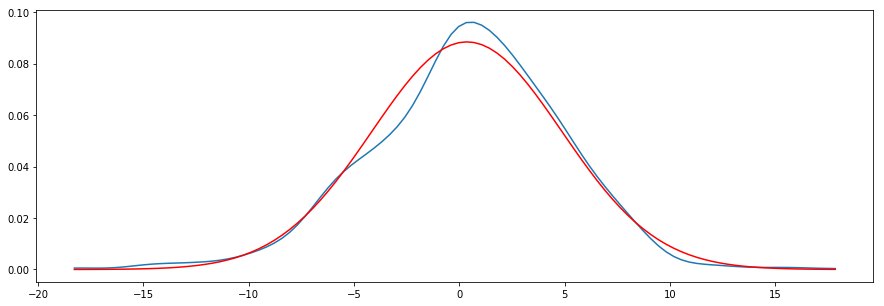

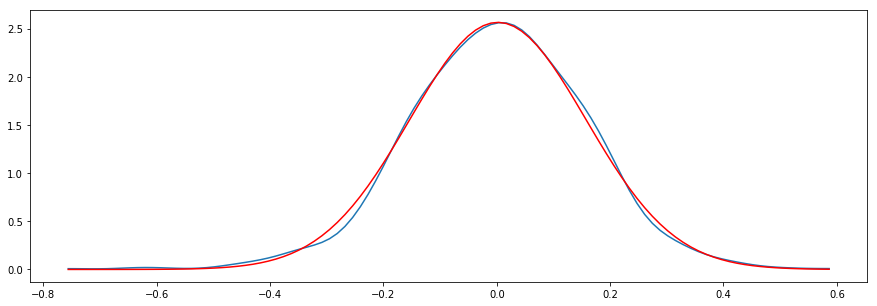

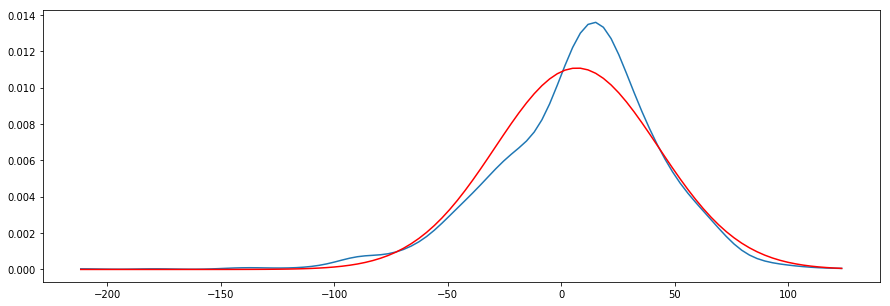

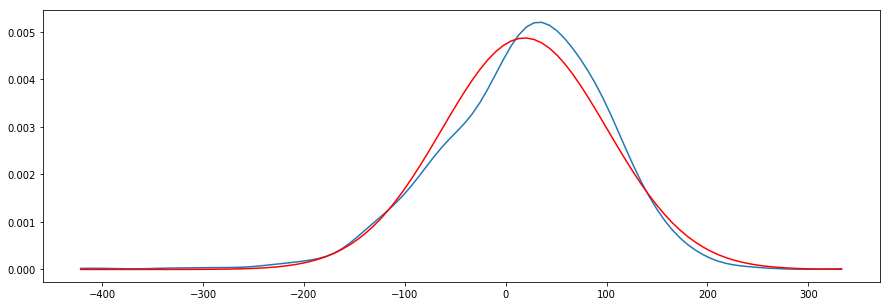

In [12]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric.kde import KDEUnivariate
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

def plotDistribution(samples):
    vmin = min(samples)
    vmax = max(samples)
    stddev = np.std(samples)
    mean = np.average(samples)
    domain = np.arange(vmin, vmax, (vmax-vmin)/100)
    
    # a simple heuristic to select bandwidth
    bandwidth = 1.06 * stddev * pow(len(samples), -.2)
    
    # estimate density
    kde = KDEUnivariate(samples)
    kde.fit(bw=bandwidth)
    density = kde.evaluate(domain)
    
    # plot
    plt.figure(figsize=(15,5))
    plt.plot(domain, density)
    
    # plot the normal distribution of the mean and std
    plt.plot(domain,norm.pdf(domain,mean,stddev),"r")
    plt.show()

plotDistribution(factorsReturns[0])
plotDistribution(factorsReturns[1])
plotDistribution(factorsReturns[2])
plotDistribution(factorsReturns[3])

For the sake of simplicity, we can say that our smoothed versions of the returns of each factor can be represented quite well by a normal distribution. Of course, more exotic distributions, perhaps with fatter tails, could fit more closely the data, but it is outside the scope of this Notebook to proceed in this way.

Now, the simplest way to sample factors returns is to use a normal distribution for each of the factors, and sample from these distributions independently. However, this approach ignores the fact that market factors are often correlated. For example, when the price of crude oil is down, the price of treasury bonds is down too. We can check our data to verify about the correlation.

### Question 6

#### Question 6.1
<div class="alert alert-info">

Calculate the correlation between market factors and explain the result.

</div>

<div class="label label-success">HINT</div> function `np.corrcoef` might be useful.

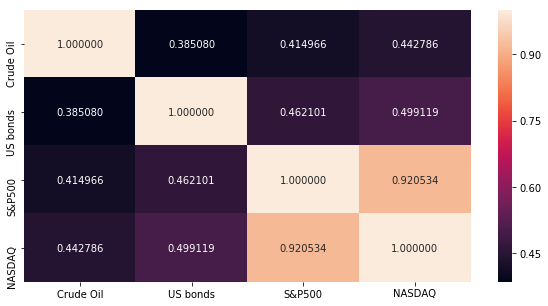

In [13]:
import seaborn as sns
#Finds the correlation between the factors
correlation = np.corrcoef(factorsReturns)
#Loads the correlation into a DataFrame for better display
df = pd.DataFrame(data=correlation,columns=['Crude Oil','US bonds','S&P500','NASDAQ'])
#Set indexes for the rows in the correlation
df.index = ['Crude Oil','US bonds','S&P500','NASDAQ']
fig, ax = plt.subplots(figsize=(10,5)) 
#Plot correlation as a heatmap
sns.heatmap(df,annot=True, fmt="f")

<div class='alert alert-success'>
The corralation matrix shows the cross correlation between the different factors. The cross correlation with itself is always 1. It is observed that the correlation between the two NYSE indexes is very high (0.92), which is to be expected as whey contain overlapping stocks. One should consider to remove one of the factors as it would not contribute with much extra information. Having multiple correlated factors as variables in a regression model is generally bad as it may lead to a false high explaination power. In other words, the model appears to be better than it really is. This is a well known trap in econometrics known as multicollinearity introduced by the Norwegian economist and Nobel laureate Ragnar Frisch.   
</div>

The multivariate normal distribution can help here by taking the correlation information between the factors into account. Each sample from a multivariate normal distribution can be thought of as a vector. Given values for all of the dimensions but one, the distribution of values along that dimension is normal. But, in their joint distribution, the variables are not independent.

For this use case, we can write:

$$
\left(\begin{array}{c}f_{1}\\f_{2}\\f_{3}\\f_{4} \end{array}\right)
\sim N 
\left[
  \left(
    \begin{array}{c}
      \mu_1\\ \mu_2 \\ \mu_3 \\ \mu_4 
    \end{array}
  \right), 
  \left(
    \begin{array}{cccc}
      \sigma^2_1 & \rho_{12} \sigma_1\sigma_2 & \rho_{13} \sigma_1\sigma_3 & \rho_{14} \sigma_1\sigma_4 \\ 
      \rho_{12}\sigma_2\sigma_1 & \sigma^2_2 & \rho_{23} \sigma_2\sigma_3 & \rho_{24} \sigma_2\sigma_4\\
      \rho_{13} \sigma_3\sigma_1 & \rho_{23} \sigma_3\sigma_2 & \sigma^2_3 & \rho_{34} \sigma_3\sigma_4 \\ 
      \rho_{14} \sigma_4\sigma_1 & \rho_{24} \sigma_4\sigma_2 & \rho_{34} \sigma_3\sigma_4 & \sigma_4^2 \\ 
    \end{array}
  \right)
\right]
$$

Or,

$$
f_t \sim N(\mu, \sum)
$$

Where $f_1$, $f_2$, $f_3$ and $f_4$ are the market factors, $\sigma_i$ is the standard deviation of factor $i$, $\mu$ is a vector of the empirical means of the returns of the factors and $\sum$ is the empirical covariance matrix of the returns of the factors.

The multivariate normal is parameterized with a mean along each dimension and a matrix describing the covariance between each pair of dimensions. When the covariance matrix is diagonal, the multivariate normal reduces to sampling along each dimension independently, but placing non-zero values in the off-diagonals helps capture the relationships between variables. Whenever having the mean of this multivariate normal distribution and its covariance matrix, we can generate the sample values for market factors.

Next, we will calculate the mean and the covariance matrix of this multivariate normal distribution from the historical data.


#### Question 6.2
<div class="alert alert-info">

Calculate the covariance matrix $\sum$ and the means $\mu$ of factors' returns then generate a random vector of factors return that follows a multivariate normal distribution $\sim N(\mu, \sum)$

</div>

<div class="label label-success">HINT</div>
Function `np.cov` can help calculating covariance matrix. Function `np.random.multivariate_normal(<mean>, <cov>)` is often used for generating samples.

Factor means
[0.35908880308880364, 0.0019722007722007863, 6.970339789189207, 18.737721800000003]

Sample for given means and covariance
[ -7.24333248  -0.07267139 -31.4327049  -35.36278904]

Factor covariance:


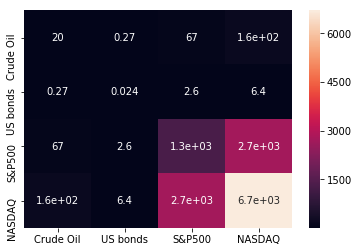

In [14]:
#Finds the mean and covariance for a set of factors
def getMeansAndCov(factorsReturns):
    factorCov = np.cov(factorsReturns)
    factorMeans = [sum(factorReturn)/len(factorReturn) for factorReturn in factorsReturns]
    return factorMeans,factorCov

factorMeans,factorCov = getMeansAndCov(factorsReturns)
sample = np.random.multivariate_normal(factorMeans,factorCov)

df = pd.DataFrame(data=factorCov,columns=['Crude Oil','US bonds','S&P500','NASDAQ'])
#Set indexes for the rows in the correlation
df.index = ['Crude Oil','US bonds','S&P500','NASDAQ']

print("Factor means")
print(factorMeans)
print()

print("Sample for given means and covariance")
print(sample)
print()

print("Factor covariance:")
sns.heatmap(df,annot=True)

### Step 3&4: Generating samples, running simulation and calculating the VaR

We define some functions that helps us calculating VaR 5%. You will see that the functions below are pretty complicated! This is why we provide a solution for you: however, study them well!!

The basic idea of calculating VaR 5% is that we need to find a value such that only 5% of the losses are bigger than it. That means the 5th percentile of the losses should be VaR 5%.

VaR can sometimes be problematic though, since it does give any information on the extent of the losses which can exceed the VaR estimate. CVar is an extension of VaR that is introduced to deal with this problem. Indeed, CVaR measures the expected value of the loss in those cases where VaR estimate has been exceeded.

In [15]:
def fivePercentVaR(trials):
    numTrials = trials.count()
    topLosses = trials.takeOrdered(max(round(numTrials/20.0), 1))
    return topLosses[-1]

# an extension of VaR
def fivePercentCVaR(trials):
    numTrials = trials.count()
    topLosses = trials.takeOrdered(max(round(numTrials/20.0), 1))
    return sum(topLosses)/len(topLosses)

def bootstrappedConfidenceInterval(
      trials, computeStatisticFunction,
      numResamples, pValue):
    stats = []
    for i in range(0, numResamples):
        resample = trials.sample(True, 1.0)
        stats.append(computeStatisticFunction(resample))
    sorted(stats)
    lowerIndex = int(numResamples * pValue / 2 - 1)
    upperIndex = int(np.ceil(numResamples * (1 - pValue / 2)))
    return (stats[lowerIndex], stats[upperIndex])

Next, we will run the Monte Carlo simulation 10,000 times, in parallel using Spark. Since your cluster has 12 cores (two Spark worker nodes, each with 6 cores), we can set `parallelism = 12` to dispatch simulation on these cores, across the two machines (remember, those are not really "physical machines", they are Docker containers running in our infrastructure).

### Question 7
<div class="alert alert-info">
Complete the code below to define the simulation process and calculate VaR 5%.
</div>

In [16]:
import time

# Original method
def simulateTrialReturns(numTrials, factorMeans, factorCov, weights):
    trialReturns = []
    for i in range(0, numTrials):
        # generate sample of factors' returns
        trialFactorReturns = np.random.multivariate_normal(factorMeans, factorCov)

        # featurize the factors' returns
        trialFeatures = featurize(trialFactorReturns).tolist()
        
        # insert weight for intercept term
        trialFeatures.insert(0,1)
        
        # calculate the return of each instrument
        # then calulate the total of return for this trial features
        #trialTotalReturn = np.sum([w * trialFeatures for w in weights],axis = 0)
        trialTotalReturn = np.dot(weights,transpose(trialFeatures))
        #print(np.array([w * trialFeatures for w in weights]))
        trialReturns.append(trialTotalReturn)
    return np.sum(trialReturns,axis=1)

t1 = time.time()
result = simulateTrialReturns(100, factorMeans,factorCov,weights)
t2 = time.time()
diff = t2-t1
print("Time used by original method:",diff)

# Improved method using numpy instead off for-loops
def betterSimulateTrialReturn(numTrials, factorMeans, factorCov, weights):

    # generate samples of factors' returns
    trialFactorReturns = np.random.multivariate_normal(factorMeans, factorCov,size=numTrials)
    # featurize the factors' returns
    trialFeatures = list(map(featurize,trialFactorReturns))

    # insert weight for intercept term
    trialFeatures = np.insert(trialFeatures, 0, 1, axis=1)

    # calculate the return of each instrument
    trialTotalReturn = np.dot(weights,trialFeatures.T)
    
    # then calulate the total of return for this trial features
    return trialTotalReturn.sum(axis=0)


t1 = time.time()
result = betterSimulateTrialReturn(100, factorMeans,factorCov,weights)
t2 = time.time()
print("Time used by improved method:",t2-t1,", Improvement",int(diff/(t2-t1)*100),"%")


Time used by original method: 0.03205275535583496
Time used by improved method: 0.0017638206481933594 , Improvement 1817 %


In [17]:
# Method for doing Monte-Carlo simulation on a set of weights, and a factor distribution
def doMCS(weights,factorMeans,factorCov,numTrials = 10000,parallelism=12):
    trial_indexes = list(range(0, parallelism))
    seedRDD = sc.parallelize(trial_indexes, parallelism)
    bFactorWeights = sc.broadcast(weights)

    trials = seedRDD.flatMap(lambda idx: \
                    betterSimulateTrialReturn(
                        max(int(numTrials/parallelism), 1), 
                        factorMeans, factorCov,
                        weights
                    ))
    trials.cache()

    valueAtRisk = fivePercentVaR(trials)
    conditionalValueAtRisk = fivePercentCVaR(trials)
    print("Value at Risk(VaR) 5%:", valueAtRisk)
    print("Conditional Value at Risk(CVaR) 5%:", conditionalValueAtRisk)
    return trials,valueAtRisk,conditionalValueAtRisk

trials,valueAtRisk,conditionalValueAtRisk = doMCS(weights,factorMeans,factorCov)

Value at Risk(VaR) 5%: -19.18618851960655
Conditional Value at Risk(CVaR) 5%: -25.142712863070585


The value of VaR depends on how many invested stocks and the chosen distribution of random variables. Assume that we get VaR 5% = -2.66,  that means that there is a 0.05 probability that the portfolio will fall in value by more than \$2.66 over a two weeks' period if there is no trading. In other words, the loses are less than \$2.66 over two weeks' period with 95% confidence level. When a loss over two weeks is more than \$2.66, we call it **failure** (or **exception**). Informally, because of 5% probability, we expect that there are only $0.05*W$ failures out of total $W$ windows.

### Step 5: Evaluating the results using backtesting method
In general, the error in a Monte Carlo simulation should be proportional to 1/sqrt(n), where n is the number of trials. This means, for example, that quadrupling the number of trials should approximately cut the error in half. A good way to check the quality of a result is backtesting on historical data. Backtesting is a statistical procedure where actual losses are compared to the estimated VaR. For instance, if the confidence level used to calculate VaR is 95% (or VaR 5%), we expect only 5 failures over 100 two-week time windows.

The most common test of a VaR model is counting the number of VaR failures, i.e., in how many windows, the losses exceed VaR estimate. If the number of exceptions is less than selected confidence level would indicate, the VaR model overestimates the risk. On the contrary, if there are too many exceptions, the risk is underestimated. However, it's very hard to observe the amount of failures suggested by the confidence level exactly. Therefore, people try to study whether the number of failures is reasonable or not, or will the model be accepted or rejected.

One common test is Kupiec's proportion-of-failures (POF) test. This test considers how the portfolio performed at many historical time intervals and counts the number of times that the losses exceeded the VaR. The null hypothesis is that the VaR is reasonable, and a sufficiently extreme test statistic means that the VaR estimate does not accurately describe the data. The test statistic is computed as:

$$
-2ln\Bigg(\frac{(1-p)^{T-x}p^x}{(1-\frac{x}{T})^{T-x}(\frac{x}{T})^x}\Bigg)
$$

where:

$p$ is the quantile-of-loss of the VaR calculation (e.g., in VaR 5%, p=0.05),

$x$ (the number of failures) is the number of historical intervals over which the losses exceeded the VaR 

$T$ is  the total number of historical intervals considered

Or we can expand out the log for better numerical stability:

$$
\begin{equation}
-2\Big((T-x)ln(1-p)+x*ln(p)-(T-x)ln(1-\frac{x}{T})-x*ln(\frac{x}{T})\Big)
\end{equation}
$$

If we assume the null hypothesis that the VaR is reasonable, then this test statistic is drawn from a chi-squared distribution with a single degree of freedom. By using Chi-squared distribution, we can find the `p-value` accompanying our test statistic value.  If `p-value` exceeds the critical value of the Chi-squared distribution, we do have sufficient evidence to reject the null hypothesis that the model is reasonable. Or we can say, in that case, the model is considered as inaccurate.

For example, assume that we calculate VaR 5% (the confidence level of the VaR model is 95%) and get value VaR = 2.26. We also observed 50 exceptions over 500 time windows. Using the formula above, the test statistic `p-value` is calculated and equal to `8.08`. Compared to `3.84`, the critical value of Chi-squared distribution with one degree of freedom at probability 5%, the test statistic is larger. So, the model is rejected. The critical values of Chi-squared can be found by following [this link](https://people.richland.edu/james/lecture/m170/tbl-chi.html).
However, in this Notebook, it's not a good idea to find the corresponding critical value by looking in a "messy" table, especially when we need to change the confidence level. Instead, from `p-value`, we will calculate the probability of the test statistic in Chi-square thanks to some functions in package `scipy`. If the calculated probability is smaller than the quantile of loss (e.g, 0.05), the model is rejected and vice versa.


### Question 8

#### Question 8.1
<div class="alert alert-info">

Write a function to calculate the number of failures, that is when the losses (in the original data) exceed the VaR.

</div>

<div class="label label-success">HINT</div>
<ul>
  <li>First, we need to calculate the total loss in each 2-week time interval</li>
  <li>If the total loss of a time interval exceeds VaR, then we say that our VaR fails to estimate the risk in that time interval</li>
  <li>Return the number of failures</li>
</ul>  

<div class="label label-danger">NOTE</div> The loss is often having negative value, so, be careful when compare it to VaR.

In [18]:
from scipy import stats
import math

# Original method for counting failures
def countFailures(stocksReturns, valueAtRisk):
    stocksReturns = np.array(stocksReturns)
    failures = 0
    # iterate over time intervals
    for i in range(0, len(stocksReturns[0])):
        # calculate the losses in each time interval
        loss = np.sum(stocksReturns[:,i])
        
        # if the loss exceeds VaR
        if loss < valueAtRisk:
            failures += 1
    return failures
t0 = time.time()
res = countFailures(stocksReturns,valueAtRisk)
timeDiff1 = time.time()-t0
print("Result:",res,", Process time:",timeDiff1)

# Improved method for counting failures.
def betterCountFailures(stockReturns,valueAtRisk):
    loss = np.sum(stockReturns,axis=0)
    return len(list(filter(lambda l: l < valueAtRisk ,loss)))

t0 = time.time()
res = betterCountFailures(stocksReturns,valueAtRisk)
timeDiff2 = time.time()-t0
print("Result:",res,", Process time:",timeDiff2, ", Improvment:",timeDiff1/timeDiff2*100,"%")

Result: 112 , Process time: 0.00861978530883789
Result: 112 , Process time: 0.002421855926513672 , Improvment: 355.91651899980315 %


#### Question 8.2
<div class="alert alert-info">

Write a function named `kupiecTestStatistic` to calculate the test statistic which was described in the above equation.

</div>

In [19]:

def kupiecTestStatistic(total, failures, confidenceLevel):
    failureRatio = failures/total
    logNumer = ((total - failures) * np.log(1-confidenceLevel)) + (failures * np.log(confidenceLevel))
    logDenom = ((total - failures) * np.log(1-failureRatio)) + (failures * np.log(failureRatio))
    return -2 * (logNumer - logDenom)


# test the function
assert (round(kupiecTestStatistic(250, 36, 0.1), 2) == 4.80), "function kupiecTestStatistic runs incorrectly"


Now we can find the p-value accompanying our test statistic value.

In [20]:
def kupiecTestPValue(stocksReturns, valueAtRisk, confidenceLevel):
    failures = betterCountFailures(stocksReturns, valueAtRisk)
    N = len(stocksReturns)
    print("num failures:", failures)
    total = len(stocksReturns[0])
    testStatistic = kupiecTestStatistic(total, failures, confidenceLevel)
    #return 1 - stats.chi2.cdf(testStatistic, 1.0)
    return stats.chi2.sf(testStatistic, 1.0)


def printTrialConfidence(trials,valueAtRisk,conditionalValueAtRisk):
    varConfidenceInterval = bootstrappedConfidenceInterval(trials, fivePercentVaR, 100, 0.05)
    cvarConfidenceInterval = bootstrappedConfidenceInterval(trials, fivePercentCVaR, 100, .05)
    print("VaR confidence interval: " , varConfidenceInterval)
    print("CVaR confidence interval: " , cvarConfidenceInterval)
    print("Kupiec test p-value: " , kupiecTestPValue(stocksReturns, valueAtRisk, 0.05))

printTrialConfidence(trials,valueAtRisk,conditionalValueAtRisk)

VaR confidence interval:  (-19.215692953091303, -19.19040547978109)
CVaR confidence interval:  (-24.713160900488685, -25.42941886736589)
num failures: 112
Kupiec test p-value:  4.1402731285861676e-08


#### Question 8.3
Discuss the results you have obtained

<div class='alert alert-success'>
<p>Value at Risk(VaR) 5%: -19.18618851960655
<p>Conditional Value at Risk(CVaR) 5%: -25.142712863070585

<p>We observe that both values are outside the confidence interval and the p-value is almost zero. This should not come as a surprise as our investment criterion was alphabetic ordering. In other words we have chosen 35 first stocks for which we have data and invested equal amounts in each of them. Using such a stupid investment strategy the number of failures are bound to sky rocket, which in turm implies that the model fails. 
</div>

### Question 9
<div class="alert alert-info">
Assume that we invest in more than 100 stocks. Use the same market factors as for the previous questions to estimate VaR by running MCS, then validate your result.  

What is the main observation you have, once you answer this question? When you plan to invest in more instruments, how is your ability to predict the risk going to be affected?
</div>


In [62]:
#Read the 100 first stock files
rawStocks = readStockFiles(100)

#Trim stock files 
stocks = trimStocks(rawStocks,start,end)

# Calculate the two week returns
stocksReturns = list(map(twoWeekReturns, stocks))

#Estimate weights for each stock compared to the factors
weights = estimateWeights(stocksReturns,factorsReturns)

#Find means and covariance for factors
factorMeans,factorCov = getMeansAndCov(factorsReturns)

#Do Monte Carlo simulation, to find value at risk.
trials,valueAtRisk,conditionalValueAtRisk = doMCS(weights,factorMeans,factorCov)

#Print the confidence intervals for VaR and CVaR and the Kupiec test value.
printTrialConfidence(trials,valueAtRisk,conditionalValueAtRisk)


Value at Risk(VaR) 5%: -40.734940174770145
Conditional Value at Risk(CVaR) 5%: -52.82003624495628
VaR confidence interval:  (-40.22408426929093, -40.71086584337343)
CVaR confidence interval:  (-53.95997423517788, -53.249798420037685)
num failures: 92
Kupiec test p-value:  0.0010490154821613416


<div class='alert alert-success'>
Using alphabetic ordering as investment criterion is still stupid, but it will become better when you invest in more stocks. This is due to the diversification effects you gain when investing in a portfolio. As an example consider a portfolio $p$ consisting of two stocks $A$ and $B$ with standard deviations of $\sigma_A$ and $\sigma_B$. They are weighted by $w_A$ and $w_B$ where $w_A + w_B = 1$. Then we get a portfolio standard deviation $\sigma_p$ equal to

$$\sigma_p = \sqrt{w_A^2 \sigma_A^2 + w_B^2 \sigma_B^2 + 2\sigma_A \sigma_B w_A w_B \rho_{AB}}$$

And it follows that the portfolio variance is lower than the sum of the variances for any case where the corralation between the stocks $\rho_{AB}$ is less than 1. This is always the case when comparing real stocks. The example is easily illustrated for two stocks, but holds for $n$ stocks. Because of this it should come as no surprise that a portfolio of 100 stocks, even though chosen stupidly, performs better than 35 stocks. 
</div>

### Question 10
<div class="alert alert-info">

In the previous questions, we used the normal distributions to sample the factors returns.  

Try to study how results vary when selecting other probability distributions: our goal is to improve the result of our MCS.
</div>

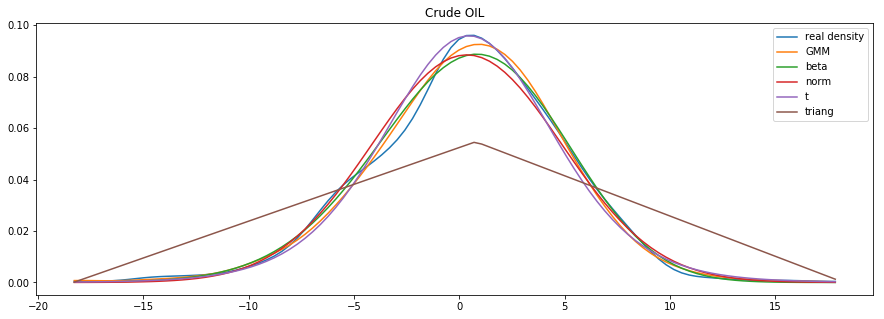

Best distribution for Crude OIL : GMM with params None



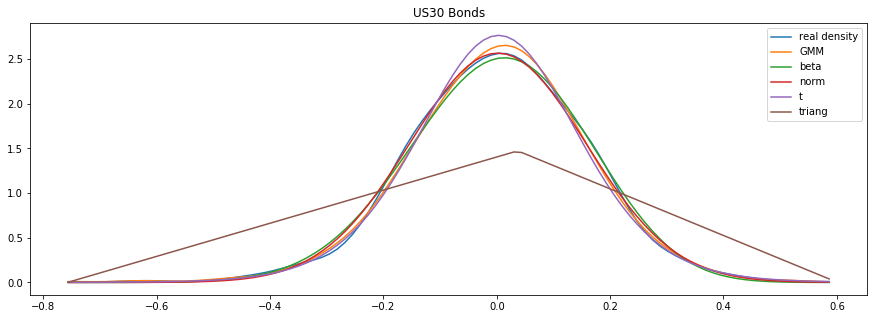

Best distribution for US30 Bonds : norm with params (0.0019722007722007724, 0.1555079880981619)



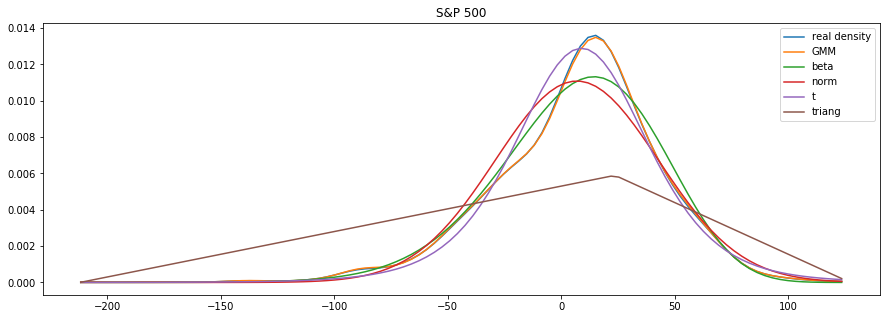

Best distribution for S&P 500 : GMM with params None



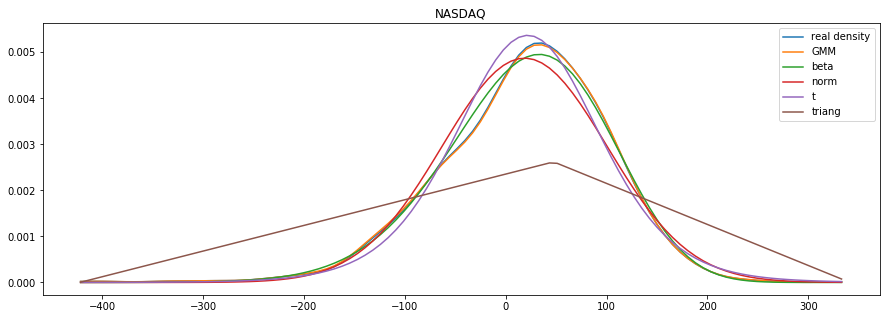

Best distribution for NASDAQ : GMM with params None



In [21]:
import warnings
from sklearn.mixture import GaussianMixture

#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python?lq=1

#Function that find the best distribution for each factor.
def findBestDistribution(factorsReturns,factor_names,GMMmodel):
    #Names of distirbutions we want to test on our factors
    dist_names = [ 'beta', 'norm','t','triang']
    
    #Take samples from the Gaussian Mixture Model to be plotted later.
    factorsReturnsGMMSamples = GMMmodel.sample(100000)[0].T
    
    for i in range(len(factorsReturns)):
        factorReturn = factorsReturns[i]
        factor_name = factor_names[i]
        samplesGMM = factorsReturnsGMMSamples[i]
    
        #Same as the code for plotting the PDF for the factors
        vmin = min(factorReturn)
        vmax = max(factorReturn)
        stddev = np.std(factorReturn)
        mean = np.average(factorReturn)
        domain = np.arange(vmin, vmax, (vmax-vmin)/100)
    
        # a simple heuristic to select bandwidth
        bandwidth = 1.06 * stddev * pow(len(factorReturn), -.2)
        
        # estimate density
        kde = KDEUnivariate(factorReturn)
        kde.fit(bw=bandwidth)
        density = kde.evaluate(domain)
        # plot real density of current factor
        plt.figure(figsize=(15,5))
        plt.plot(domain,density,label="real density")
        
        # estimate GMM data density
        kde = KDEUnivariate(samplesGMM)
        kde.fit(bw=bandwidth)
        # plot the estimated density using GMM for current factor
        densityGMM = kde.evaluate(domain)
        plt.plot(domain,densityGMM,label="GMM")
        
        # variables to hold the best distribution for current factor
        lowest_error = np.average((np.square(densityGMM - density)))
        best_dist = "GMM"
        params = None
        
        #For each distribution listed above
        for dist_name in dist_names:
        
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                #Get the distribution object corresponding to the name
                dist = getattr(scipy.stats, dist_name)
                #Fit our factor data to the current distribution.
                param = dist.fit(factorReturn)
                #Make density data over our domain based on the params obtained above.
                pdf_fitted = dist.pdf(domain, *param[:-2], loc=param[-2], scale=param[-1])
                #Plot the densirt of the current distribution
                plt.plot(domain,pdf_fitted, label=dist_name)
                #Messure the error compared the real density of our data
                error = np.average((np.square(pdf_fitted - density)))
            
                #If the error is lower than the lowest error so far, set the current distribution to be the best
                if (lowest_error == None or error < lowest_error):
                    best_dist = dist_name
                    lowest_error = error
                    params = param
    
        plt.legend(loc='upper right')
        plt.title(factor_name)
        plt.show()
        print("Best distribution for",factor_name,":",best_dist,"with params",params)
        print()

#Init a Gaussian Mixture Model for fitting factor data
GMM = GaussianMixture(n_components=100, covariance_type='full', max_iter=1000, n_init=5, \
                          init_params='kmeans')

#Make model for the current factors which are 'Crude Oil','US bonds','S&P500','NASDAQ'
model = GMM.fit(np.array(factorsReturns).T)

factor_names = ["Crude OIL","US30 Bonds","S&P 500","NASDAQ"]
findBestDistribution(factorsReturns,factor_names,model)

In [22]:
# for simplicity all factors are generated using GMM even when a normal distribution is better for US30 bonds
def simulateTrialReturnWithBestDist(numTrials, model, weights):
    # sample factor returns from the GMM model.
    trialFactorReturns = model.sample(numTrials)[0]
    
    # featurize factor returns
    trialFeatures = list(map(featurize,trialFactorReturns))
    
    # insert weight for intercept term
    trialFeatures = np.insert(trialFeatures, 0, 1, axis=1)
    
    # calculate the return of each instrument
    trialTotalReturn = np.dot(weights,trialFeatures.T)
    
    # then calulate the total of return for this trial features
    return trialTotalReturn.sum(axis=0)

# improved Monte Carlo simulation, that used GMM for factor sample generation
def doImprovedMCS(weights,model,numTrials = 10000,parallelism=12):
    trial_indexes = list(range(0, parallelism))
    seedRDD = sc.parallelize(trial_indexes, parallelism)
    bFactorWeights = sc.broadcast(weights)

    trials = seedRDD.flatMap(lambda idx: \
                    simulateTrialReturnWithBestDist(
                        max(int(numTrials/parallelism), 1)
                        ,model 
                        ,weights
                    ))
    trials.cache()
    valueAtRisk = fivePercentVaR(trials)
    conditionalValueAtRisk = fivePercentCVaR(trials)
    print("Value at Risk(VaR) 5%:", valueAtRisk)
    print("Conditional Value at Risk(CVaR) 5%:", conditionalValueAtRisk)
    return trials,valueAtRisk,conditionalValueAtRisk


trials,valueAtRisk,conditionalValueAtRisk = doImprovedMCS(weights,model)

printTrialConfidence(trials,valueAtRisk,conditionalValueAtRisk)

Value at Risk(VaR) 5%: -20.557106793182484
Conditional Value at Risk(CVaR) 5%: -30.780923892679183
VaR confidence interval:  (-20.792926898276274, -21.18281474247421)
CVaR confidence interval:  (-31.308503407780478, -30.444397016055103)
num failures: 96
Kupiec test p-value:  0.00019147141975178153


<div class='alert alert-success'>
GMM distributions for the factors fits the data better than the previously Gaussian distributions, but the p-values are still far from being statistically significant.
</div>

# Additional work

## Finding the best stocks for our portifolio

<div class='alert alert-success'>
As mentioned on mutliple occasions chosing stocks based on alphabetic ordering is not a good idea. There are multiple methods of stock picking and we have gone for a simple on based on the Sharpe ratio, $S_R$. Sharpe ratio is defined as follows

$$S_R = \frac{E(p) - r_f}{\sigma_p}$$

where $E(p) - r_f$ is the portfolios excess return, in other words, the return above there return you can expect above a risk free investment with yield $r_f$. It is common to use the US 30 year bonds rate as the risk free rate as investing in US Government bonds are considered almost risk free. $\sigma_p$ is still the portfolios standard deviation. Note that the $r_f$ must be normalized to the two week window we are looking at.

We will find and invest in the stocks with the highest $S_R$, the stocks which gives us the most return per unit risk. 
</div>

In [23]:
import time
from io import StringIO

r_f = 0.035 / 26

# There are over 2600 different stocks in our dataset. So processing them all takes a lot of time.
# Since our data allready exists in HDFS, it is very easy to make a distributed algorithm that uilizes the power of parallel computing.

def findBestStocksDistributed(start,end):
    # makes an RDD from the entire stocks folder, with key-value pair of (filename,file-content)
    stocksRDD = sc.wholeTextFiles('/datasets/monte-carlo-risk/stocks/*.csv')
    # broadcast the start and end times to our workers
    bStart = sc.broadcast(start)
    bEnd = sc.broadcast(end)
    
    def processStockFile(file):
        fileName = file[0]
        content = file[1]
        # load file content into a DataFrame for easier processing, and keep wanted columns
        df = pd.read_csv(StringIO(content))[["Date","Open"]]
        
        # concert each entry in the Date column to a Datetime object
        df["Date"] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
        
        # sort stock entries from oldes to newest
        data = sorted(df.values.tolist(),key=lambda x:x[0])
        
        # filter out corrupt data
        if(np.max(np.array(data)[:,1]) >= 2752.56):
            return (fileName,[])
        
        # timr stock data to wanted time period
        stock_data = trimStock(data)
           
        return (fileName,stock_data)
    
    def findSharpe(file):
        fileName = file[0]
        history = file[1]
        
        # finds the percentage change in each two week window. NOTE. window is not sliding anymore
        stockReturns = findChange(history,10)
        
        # calculated the average change over the entire period
        avg_returns = np.average(stockReturns)
        
        # find the standard deviation for the changes in the entire period
        std = np.std(stockReturns)
        
        # finds sharpe for the current stock in the given period
        sharpe = (avg_returns - r_f) / std
        
        return (fileName,[sharpe,std,avg_returns])
    
    def trimStock(stock):
        return fillInHistory(trimToRegion(stock, bStart.value, bEnd.value) , bStart.value, bEnd.value)
    
    def trimToRegion(history, start, end):
        def isInTimeRegion(entry):
            (date, value) = entry
            #date = datetime.strptime(date,"%Y-%m-%d")
            return date >= start and date <= end
        # only select entries which are in the time region
        trimmed = list(filter( isInTimeRegion, history))
        if(len(trimmed) == 0):
            return []
        # if the data has incorrect time boundaries, add time boundaries
        if trimmed[0][0] != start:
            trimmed.insert(0, [start, trimmed[0][1]])
        if trimmed[-1][0] != end:
            trimmed.append([end, trimmed[-1][1]])
        return trimmed
    
    # Find the change in value in a given window
    def findChange(seq, k=2):
        periods = []

        for i in range(int(len(seq)/k)):
            
            # if there are more than k entries left in the sequence
            if((i+1)*k <= len(seq)):
                period = seq[i*k:(i+1)*k]
            
            # if there are less than k entries left in the sequence
            else:
                period = seq[i*k:]
            # Find the change in percent from the start of the window to the end.
            change = period[-1][1] / period[0][1] - 1
            
            periods.append(change)
            
        return periods
                        
    def fillInHistory(history, start, end):
        curr = history
        filled = []
        idx = 0
        curDate = start
        numEntries = len(history)
        if(numEntries == 0):
            return []
        while curDate < end:
            while idx + 1 < numEntries and curr[idx + 1][0] == curDate:
                idx +=1        
            if curDate.weekday() < 5:
                filled.append((curDate, curr[idx][1]))
                curDate += timedelta(days=1) 
            elif curDate.weekday() >= 5:
                curDate += timedelta(days=(7-curDate.weekday()))
        return filled
    
            #Partition our files accross our cluster
    return (stocksRDD.repartition(12)\
        #Process stock files, and format data according to start and end.
        .map(lambda file : processStockFile(file))\
        #Filter out stocks that do not have any history in the current period.
        .filter(lambda stock : len(stock[1]) != 0)\
        #Find the sharp for each remainding stock
        .map(lambda stock : findSharpe(stock))\
        #Sort stocks based on decreasing sharp.
        .sortBy(lambda x : x[1][0],0)\
        .collect())
        
    


t1 = time.time()

# finds the best stocks sorted by sharpe
best_portfolio = findBestStocksDistributed(start,end)

df = pd.DataFrame(data=[x[1] for x in best_portfolio],columns=["Sharpe","Std","Avg return"])

# Filenames is the path of the file on HDFS. only needs last part AKA file name
stock_names = list(map(lambda x : x.split("/")[-1],[x[0] for x in best_portfolio]))

# set stock names as indices of the DataFrame
df.index = stock_names
t2 = time.time()
print("Processing time =",(t2-t1))
# print 10 best stocks
print(df[:10])

Processing time = 146.28189730644226
             Sharpe       Std  Avg return
STRZB.csv  0.357611  0.079315    0.029710
BOFI.csv   0.350704  0.071488    0.026417
HSTM.csv   0.339382  0.076126    0.027182
AAPL.csv   0.327146  0.046023    0.016402
PCLN.csv   0.321886  0.061491    0.021139
ULTI.csv   0.313335  0.059709    0.020055
STX.csv    0.299729  0.098142    0.030762
ARMH.csv   0.296603  0.067791    0.021453
ULTA.csv   0.295905  0.073754    0.023170
TRS.csv    0.288496  0.100099    0.030224


<div class='alert alert-success'>
Observation: Even though each individual stock have a low sharpe ratio, the portfolios $S_r$ will be higher due to the diversification effect discussed above.
</div>

In [24]:
# Given a list of stock names, finds the indices they have in the folder structure
def findIndices(stock_names):
    files = [f for f in listdir(stock_folder)]
    indices = [files.index(name) for name in stock_names]
    return indices

# Find indices of 100 best stocks
best_stocks = findIndices(stock_names[:100])

In [25]:
# prints the sharpe, expected return and risk of the given portifolio, and weights
def findPortfolioInfo(portfolioWeights,portfolioReturns):
    portfolioReturns = np.array(portfolioReturns)
    portfolioExpRet = np.average(np.mean(portfolioReturns,axis=1), weights=portfolioWeights.ravel())
    portfolioRisk = math.sqrt((np.average((np.mean(portfolioReturns,axis=1) - portfolioExpRet)**2, weights=portfolioWeights.ravel())))
    portfolioSharpe = ( portfolioExpRet - r_f ) / portfolioRisk
    print("Portfolio return within period: ", portfolioExpRet)
    print("Portfolio risk", portfolioRisk)
    print("Portfolio Sharpe ratio", portfolioSharpe)
    

In [26]:

# read the 100 best stocks 
rawStocks = readStockFiles(indices=best_stocks)

# trim selected stocks into given time period
stocks = trimStocks(rawStocks,start,end)

# the weights each stock should have in our portifolio. In this case equal for all
portfolioWeights = (np.ones((len(stocks),1)) / len(stocks)) * len(stocks)#invest equal amounts in every stock


stocksReturns = list(map(twoWeekReturns, stocks))

findPortfolioInfo(portfolioWeights,stocksReturns)

weightedStocksReturns = np.multiply(stocksReturns, portfolioWeights)

weights = estimateWeights(weightedStocksReturns,factorsReturns)

trials,valueAtRisk,conditionalValueAtRisk = doImprovedMCS(weights,model)

printTrialConfidence(trials,valueAtRisk,conditionalValueAtRisk)


Portfolio return within period:  0.5560770137065637
Portfolio risk 1.023990601795224
Portfolio Sharpe ratio 0.5417343273345236
Value at Risk(VaR) 5%: -166.80673636470937
Conditional Value at Risk(CVaR) 5%: -244.29608531657613
VaR confidence interval:  (-161.05313883960315, -166.21225398793544)
CVaR confidence interval:  (-246.22377627299653, -239.67754140243252)
num failures: 76
Kupiec test p-value:  0.16220635542516473


<div class='alert alert-success'>
Choosing 100 stocks based on $S_r$ seemingly leaves of worse of than just choosing based on alphabetic ordering, as the VaR is much higher. But looking at the numbers more closely one can observe that the risk is higher, which obviously leaves us with a potential higher loss. But still we gain a higher revenue per unit risk we take. It is also worth noticing that this inverval is statistically significant. Also the investment above assumes that all stocks in the portfolio are weighted equally, which is generally not the case. We can thus use the CAPM model to calculate the optimal portfolio weights under the following assumptions about all investors in the market:
<ul>
<li> Aim to maximize economic utilities (Asset quantities are given and fixed).</li>
<li> Are rational and risk-averse.</li>
<li> Are broadly diversified across a range of investments.</li>
<li> Are price takers, i.e., they cannot influence prices.</li>
<li> Can lend and borrow unlimited amounts under the risk free rate of interest.</li>
<li> Trade without transaction or taxation costs.</li>
<li> Deal with securities that are all highly divisible into small parcels (All assets are perfectly divisible and liquid).</li>
<li> Have homogeneous expectations.</li>
<li> Assume all information is available at the same time to all investors.</li>
</ul>
Of course some of these assumptions can be quite controversial, but some of the may be lifted if one uses more complex economic models.
    
</div>

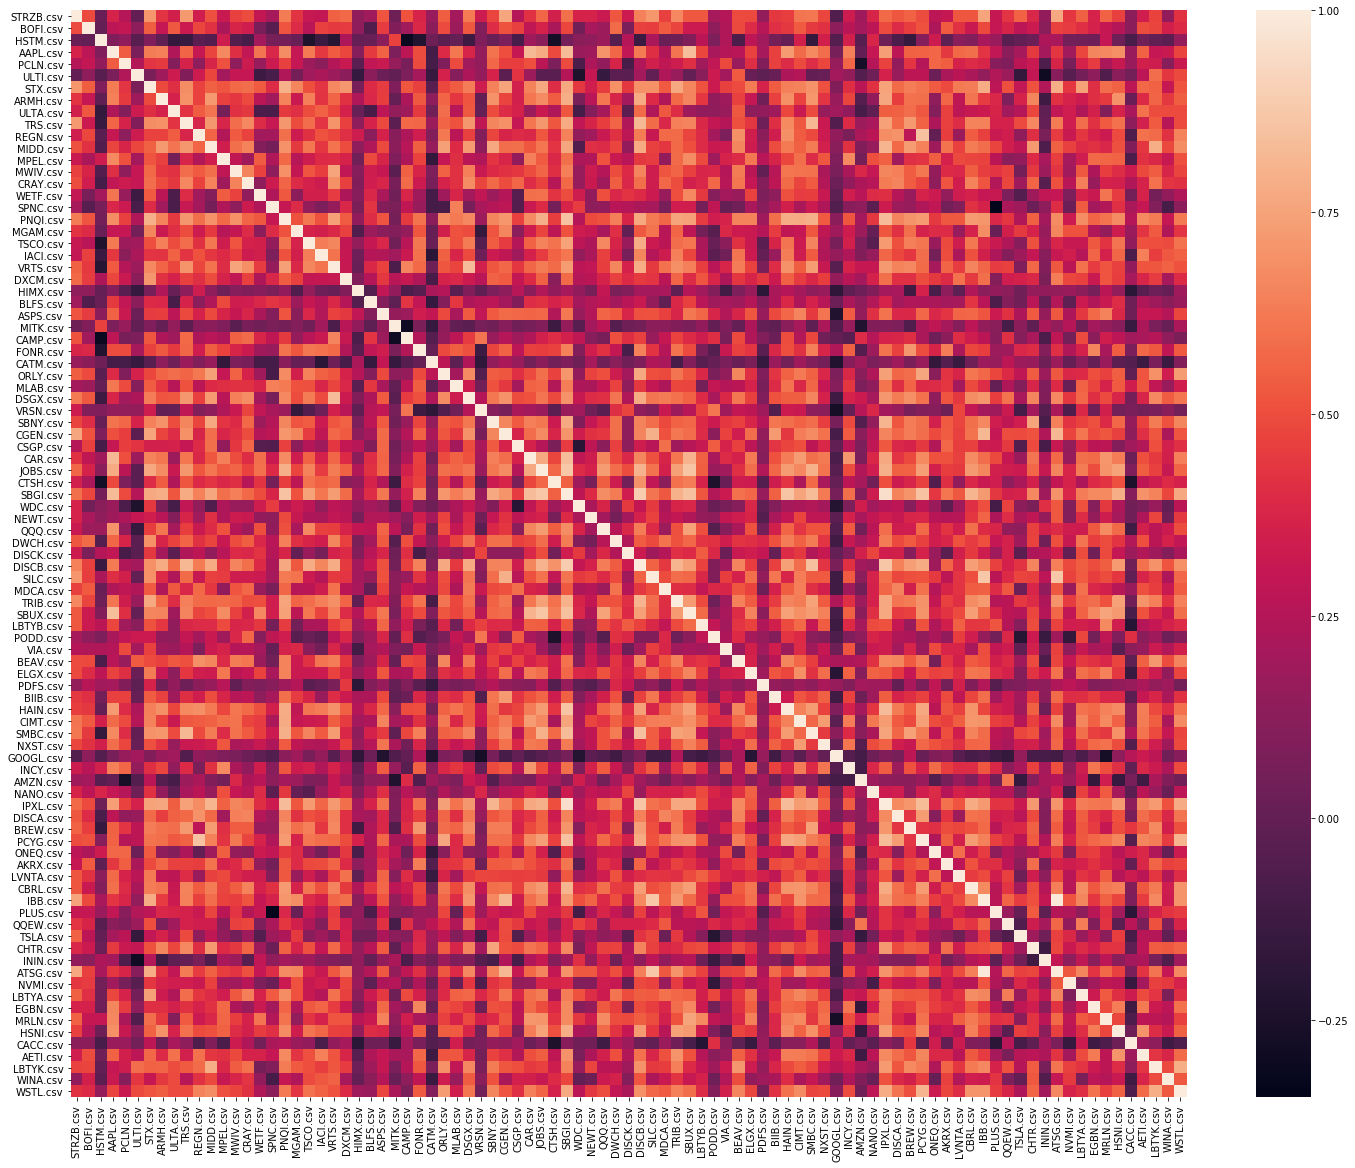

In [86]:
bestStocksCorrelation = np.corrcoef(stocksReturns)

#Loads the correlation into a DataFrame for better display
df = pd.DataFrame(data=bestStocksCorrelation,columns=stock_names[:len(stocksReturns)])
#Set indexes for the rows in the correlation
df.index = stock_names[:len(stocksReturns)]
fig, ax = plt.subplots(figsize=(25,20)) 
#Plot correlation as a heatmap
sns.heatmap(df)

In [29]:
def findOptimalStockWeights(portfolioReturns,r_f):
    portfolioReturns = np.array(portfolioReturns)
    portfolioCovMat = np.cov(portfolioReturns)
    weightsTmp = (1 / portfolioCovMat) * (np.mean(portfolioReturns,axis=1) - r_f)
    portfolioWeights = (weightsTmp / np.sum(weightsTmp, axis=0))[:,0]
    return portfolioWeights.reshape(len(portfolioWeights),1) * len(stocks)


rawStocks = readStockFiles(indices=best_stocks)

stocks = trimStocks(rawStocks,start,end)

stocksReturns = list(map(twoWeekReturns, stocks))

portfolioWeights = findOptimalStockWeights(stocksReturns,r_f)

findPortfolioInfo(portfolioWeights,stocksReturns)

weightedStocksReturns = np.multiply(stocksReturns, portfolioWeights)

weights = estimateWeights(weightedStocksReturns,factorsReturns)

trials,valueAtRisk,conditionalValueAtRisk = doImprovedMCS(weights,model)

printTrialConfidence(trials,valueAtRisk,conditionalValueAtRisk)

Portfolio return within period:  0.1290211876262444
Portfolio risk 0.24112979727117353
Portfolio Sharpe ratio 0.529486754540368
Value at Risk(VaR) 5%: -29.03619308546091
Conditional Value at Risk(CVaR) 5%: -44.099706808045404
VaR confidence interval:  (-28.029306756149, -28.78102661223739)
CVaR confidence interval:  (-44.40131978168417, -42.79811688686067)
num failures: 349
Kupiec test p-value:  1.267008827135084e-149


<div class='alert alert-success'>
The VaR is much lower than in the equal weights case. Here we have a small calculation error which gives a lower Sharpe ratio with optimal weights than with equal weights, this is not possible. We also have a way too low p-value here. 
</div>

## More factors

<div class='alert alert-success'>
Gold is generally consideres a safe asset by investors due to its pyhiscal value. The gold price is also very weakly correlated to the stock market fluctuations and other commodities (crude oil in our case). Gold should therefore be a good candidate as an aditional factor in the model. Since all stocks are given in USD using currency as a factor does not make much sense either. Currency trading is a very complex topic topic of its own, and professional investors often buy currency futures when dealing with portfolios in multiple currencies. This eliminates the uncertainty of currency fluctuations.

When dealing with commodity trading, one generally buys commodity futures and not the commodities themself.
</div>

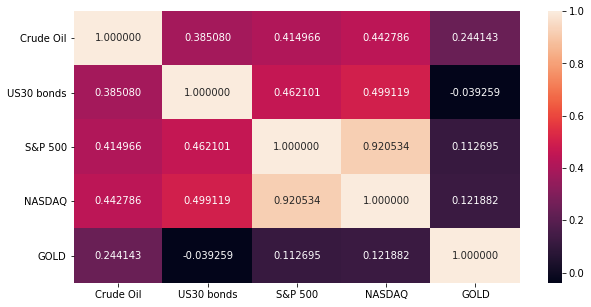

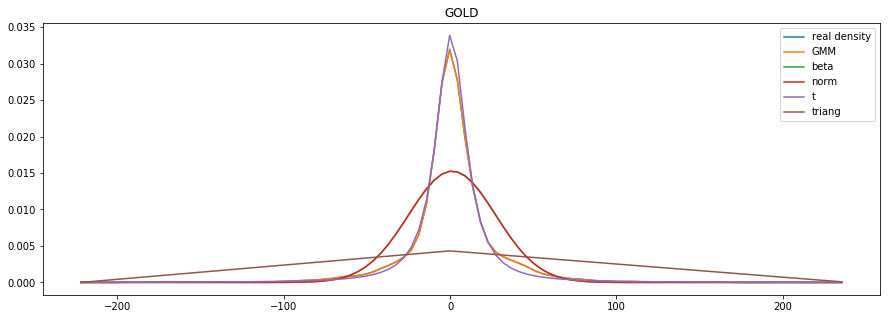

Best distribution for GOLD : GMM with params None



In [70]:
def readGoldHistory(fname):
    df = pd.read_csv(fname)
    df["Date"] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    return sorted(df.values.tolist(),key=lambda x:x[0])

factor3_files = ["Gold.csv"]
factor3_files = map(lambda fn: factors_folder + fn, factor3_files)

factors3 = [readGoldHistory(f) for f in factor3_files]

allfactors = factors1 + factors2 + factors3

factors = trimFactors(allfactors,start,end)
factorsReturns = list(map(twoWeekReturns, factors))

# make a new heatmap of the correlation between factors. This time with GOLD
correlation = np.corrcoef(factorsReturns)
df = pd.DataFrame(data=correlation,columns=['Crude Oil','US30 bonds','S&P 500','NASDAQ','GOLD'])
df.index = ['Crude Oil','US30 bonds','S&P 500','NASDAQ','GOLD']
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(df,annot=True, fmt="f")

# find the return of GOLD in each sliding window
goldFactorReturn = list(map(twoWeekReturns, factors3))

# fit a GMM model to the GOLD return data
model = GMM.fit(np.array(goldFactorReturn).T)

factor_names = ["GOLD"]
findBestDistribution(goldFactorReturn,factor_names,model)

In [71]:
# using the 100 best stocks , and the new facorsReturns containing GOLD
weights = estimateWeights(stocksReturns,factorsReturns)

model = GMM.fit(np.array(factorsReturns).T)

trials,valueAtRisk,conditionalValueAtRisk = doImprovedMCS(weights,model)

printTrialConfidence(trials,valueAtRisk,conditionalValueAtRisk)

Value at Risk(VaR) 5%: -168.09756059339244
Conditional Value at Risk(CVaR) 5%: -242.29931645329202
VaR confidence interval:  (-166.0306608178871, -165.86547465500527)
CVaR confidence interval:  (-248.72572460451818, -248.76515918649574)
num failures: 75
Kupiec test p-value:  0.20186918639579501


In [72]:
# read only 100 first stocks
rawStocks = readStockFiles(100)

stocks = trimStocks(rawStocks,start,end)

stocksReturns = list(map(twoWeekReturns, stocks))

#Estimate weights for each stock compared to the factors
weights = estimateWeights(stocksReturns,factorsReturns)

model = GMM.fit(np.array(factorsReturns).T)

trials,valueAtRisk,conditionalValueAtRisk = doImprovedMCS(weights,model)

printTrialConfidence(trials,valueAtRisk,conditionalValueAtRisk)

Value at Risk(VaR) 5%: -43.55576368973428
Conditional Value at Risk(CVaR) 5%: -63.24567660073519
VaR confidence interval:  (-43.87491141262422, -43.71661373494595)
CVaR confidence interval:  (-63.79178983919671, -64.76746735569938)
num failures: 82
Kupiec test p-value:  0.0343451353414695


<div class='alert alert-success'>
It is observed that the p-value increases with the extra Gold factor for both the 100 first and 100 best stocks. The factor clearly gives the model more information since it is uncorrelated to the other factors.
</div>

## Factors during crisis

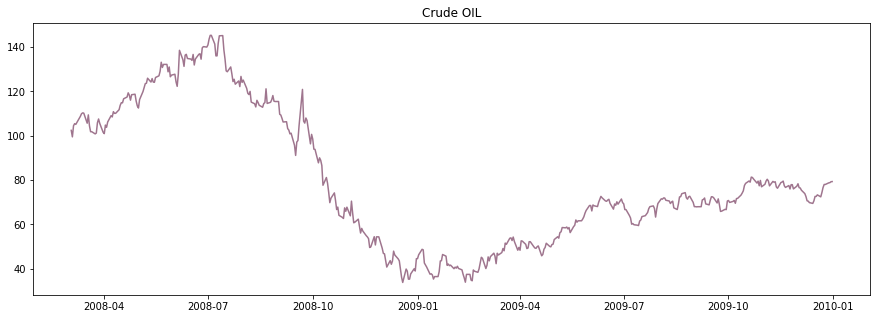

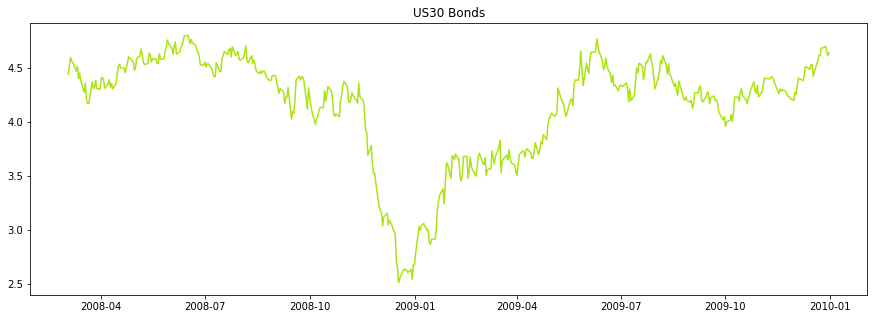

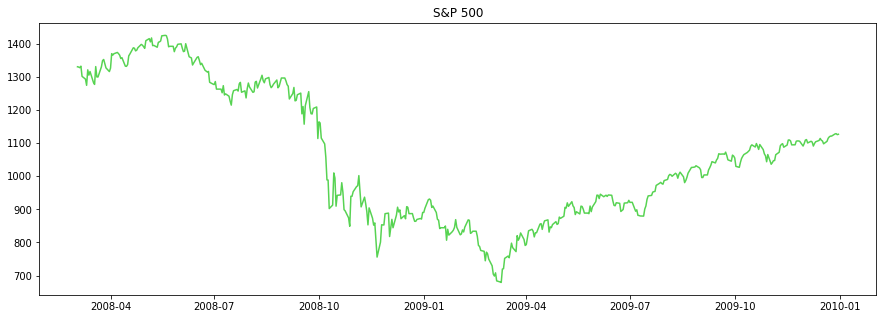

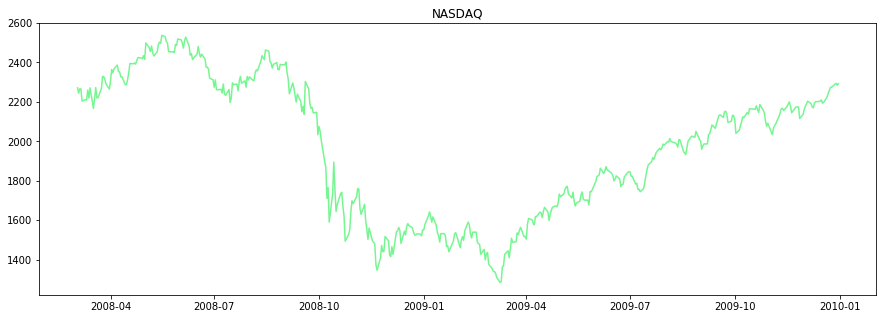

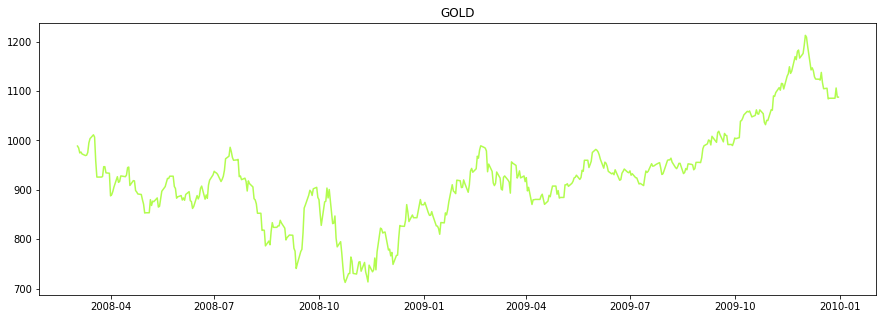

In [73]:
start = datetime(year=2008, month=3, day=1)
end = datetime(year=2010, month=1, day=1)

factors_during_crisis = trimFactors(allfactors,start,end)

factor_names = ["Crude OIL","US30 Bonds","S&P 500","NASDAQ","GOLD"]

for i in range(len(factors_during_crisis)):
    factor = factors_during_crisis[i]
    name = factor_names[i]
    factor = np.array(factor)
    plt.figure(figsize=(15,5))
    plt.title(name)
    plt.plot(factor[:,0],factor[:,1],c=np.random.rand(3,))
    plt.show()
    

In [74]:
start2 = datetime(year=2008, month=9, day=1)
end2 = datetime(year=2009, month=4, day=1)


factors = trimFactors(allfactors,start2,end2)

factorsReturns = list(map(twoWeekReturns, factors))

rawStocks = readStockFiles(indices=best_stocks,start=start2,end=end2)

stocks = trimStocks(rawStocks,start2,end2)

stocksReturns = list(map(twoWeekReturns, stocks))

#Estimate weights for each stock compared to the factors
weights = estimateWeights(stocksReturns,factorsReturns)

model = GMM.fit(np.array(factorsReturns).T)

portfolioWeights = (np.ones((len(stocks),1)) / len(stocks)) * len(stocks)#invest equal amounts in every stock

findPortfolioInfo(portfolioWeights,stocksReturns)

trials,valueAtRisk,conditionalValueAtRisk = doImprovedMCS(weights,model)

printTrialConfidence(trials,valueAtRisk,conditionalValueAtRisk)

Portfolio return within period:  -0.4943321405517559
Portfolio risk 0.874903553887876
Portfolio Sharpe ratio -0.5665519270040978
Value at Risk(VaR) 5%: -303.0447952109304
Conditional Value at Risk(CVaR) 5%: -386.2347590409016
VaR confidence interval:  (-303.99775490963987, -303.0404906059828)
CVaR confidence interval:  (-384.5645980761549, -386.6292842734374)
num failures: 10
Kupiec test p-value:  0.30102056384639647


<div class='alert alert-success'>
The Sharpe ratio of the portfolio is negative and the VaR is very high, but the model is significant. Here it would be much better to hold a short position in multiple stocks and/or invest in the risk free bonds depending on the investors risk aversion.
</div>

## Improving model further

In [82]:
factorMat = transpose(factorsReturns)    
# featurize each row of factorMat
factorFeatures = list(map(featurize,factorMat))
# OLS require parameter is a numpy array
factor_columns = np.array(factorFeatures)
print("Stock:",stock_names[0])
print(sm.OLS(stocksReturns[0], factor_columns).fit().summary())

Stock: STRZB.csv
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     14.02
Date:                Thu, 12 Apr 2018   Prob (F-statistic):           1.98e-20
Time:                        18:43:15   Log-Likelihood:                 82.169
No. Observations:                 143   AIC:                            -134.3
Df Residuals:                     128   BIC:                            -89.90
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0001      0.000   

<div class='alert alert-success'>
For this particualir stock we observe an R-squared of 0.622 for the VaR model which is quite poor. Also the multicolinearity effects mentined earlier will have an effect here. Thus the real explaination power of the model is probably a lot poorer.
</div>

## Alternative models for stock picking
<div class='alert alert-success'>
As we saw earlier there are quite a few (unrealistic) assumptions made when applying the CAPM model. As a result it has shown poor results when tested emipirically. The VaR also struggles with failing assumptions and are yields quite poor results. One solution may be to expant the CAPM model into a Fama & French 3 or 5 factor model, which have been empirically tested to give better results than CAPM. But even the five factor model has been shown not to hold when tested on UK financial markets.  
</div>

## Conclusion
<div class='alert alert-success'>
One must conclude that both CAPM and VaR are unable to capture the complexity of a financial market. This should not be a surprise, there are many companies specialicing in algorithmic trading and financial analysis. If one could create a simple VaR model and be filthy rich there would not a marked for such companies. 
</div>

# 6. Summary
In this lecture, we studied the Monte Carlo Simulation method and its application to estimate financial risk. To apply it, first, we needed to define the relationship between market factors and the instruments' returns. In such step, you must define the model which maps the market factors' values to the instruments' values: in our use case, we used a linear regression function for building our model. Next, we also had to find the parameters of our model, which are the weights of the factors we considered. Then, we had to study the distribution of each market factor. A good way to do that is using Kernel density estimation to smooth the distribution and plot it. Depending on the shape of each figure, we had to guess the best fit distribution for each factor: in our use case, we used a very simple approach, and decided that our smoothed distributions all looked normal distributions. 

Then, the idea of Monte Carlo simulation was to generate many possible values for each factor and calculate the corresponding outcomes by a well-defined model in each trial. After many trials, we were able to calculate VaR from the sequences of outcome's values. When the number of trials is large enough, the VaR converges to reasonable values, that we could validate using well-known statistical hypothesis. 

# References
- The example in section 2 is inspired from [this article](http://www.solver.com/monte-carlo-simulation-example).
- [Backtesting Value-at-Risk models](https://aaltodoc.aalto.fi/bitstream/handle/123456789/181/hse_ethesis_12049.pdf?sequence=1) (Kansantaloustiede, 2009) - (A good reference to study Backtesting).
- Arnold, Glen (2005). Corporate financial management (3. ed.). 
- James Foye (2017). A Comprehensive Test of the Fama-French Five-Factor Model in Emerging Markets